# House Pricing Advance Regression Assignment

## Step 1: Reading House Pricing Dataset

In [1]:
#importing basic package

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing machine learning packages

import statsmodels.api as sm
from sklearn.preprocessing import scale
from sklearn import linear_model, metrics
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#loading house price dataset

house_price_data = pd.read_csv('train.csv')

In [4]:
house_price_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
house_price_data.shape

(1460, 81)

In [6]:
house_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#getting categorical columns

categorical = house_price_data.select_dtypes(include='object').columns

In [8]:
# getting data counts for all cateforical data counts

for cat_col in categorical:
    print(cat_col)
    print('****')
    print((house_price_data[cat_col].value_counts()/len(house_price_data[cat_col]))*100)
    print('######################################')
    
    

MSZoning
****
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
######################################
Street
****
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
######################################
Alley
****
Grvl    3.424658
Pave    2.808219
Name: Alley, dtype: float64
######################################
LotShape
****
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
######################################
LandContour
****
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
######################################
Utilities
****
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
######################################
LotConfig
****
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: flo

In [9]:
#getting numerical columns

numeric = house_price_data.select_dtypes(include=['int64','float']).columns

In [10]:


for num_col in numeric:
    print(num_col)
    print('****')
    print((house_price_data[num_col].value_counts()/len(house_price_data[num_col]))*100)
    print('_____________________________________')
    print(num_col)
    print('****')
    print(house_price_data[num_col].describe())
    print('######################################')
    

Id
****
1       0.068493
982     0.068493
980     0.068493
979     0.068493
978     0.068493
          ...   
485     0.068493
484     0.068493
483     0.068493
482     0.068493
1460    0.068493
Name: Id, Length: 1460, dtype: float64
_____________________________________
Id
****
count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64
######################################
MSSubClass
****
20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
_____________________________________
MSSubClass
****
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75% 

count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64
######################################
BedroomAbvGr
****
3    55.068493
2    24.520548
4    14.589041
1     3.424658
5     1.438356
6     0.479452
0     0.410959
8     0.068493
Name: BedroomAbvGr, dtype: float64
_____________________________________
BedroomAbvGr
****
count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64
######################################
KitchenAbvGr
****
1    95.342466
2     4.452055
3     0.136986
0     0.068493
Name: KitchenAbvGr, dtype: float64
_____________________________________
KitchenAbvGr
****
count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000

## Step 2 : Data Cleaning

In [11]:
# Removing ID as this will be not use in analysing

house_price_data.drop('Id',axis = 1, inplace = True)

In [12]:
# checking null value

null_columns = house_price_data.columns[house_price_data.isnull().any()]

null_columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [13]:
# checking null value percentage

null_value_percent = house_price_data[null_columns].isnull().sum().sort_values(ascending=False)*100/len(house_price_data)
null_value_percent

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [14]:
# chekcing null value more than 15%

null_value_15_percent = null_value_percent[null_value_percent >15].sort_values(ascending=False)

null_value_15_percent

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
LotFrontage    17.739726
dtype: float64

In [15]:
# checking null value counts for categorical (object)

house_price_data.select_dtypes(include='object').isnull().sum()[house_price_data.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [16]:
for cols in ('Alley',
'MasVnrType',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'Electrical',
'FireplaceQu',
'GarageType',
'GarageFinish',
'GarageQual',
'GarageCond',
'PoolQC',
'Fence',
'MiscFeature'
):
    # checking the counts of categorical columns
    print(cols)
    print('****')
    print((house_price_data[cols].value_counts()/len(house_price_data[cols]))*100)
    print('----------------------------------------')
    
    # filling the null value with NONE
    
    house_price_data[cols] = house_price_data[cols].fillna('None')
    
    # checking the columns of categorical columns after filling with NONE
    print('##########################################')
    print('After Filling Null Values with None')
    print('##########################################')
    print(cols)
    print('****')
    print((house_price_data[cols].value_counts()/len(house_price_data[cols]))*100)
    print('----------------------------------------')

Alley
****
Grvl    3.424658
Pave    2.808219
Name: Alley, dtype: float64
----------------------------------------
##########################################
After Filling Null Values with None
##########################################
Alley
****
None    93.767123
Grvl     3.424658
Pave     2.808219
Name: Alley, dtype: float64
----------------------------------------
MasVnrType
****
None       59.178082
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64
----------------------------------------
##########################################
After Filling Null Values with None
##########################################
MasVnrType
****
None       59.726027
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64
----------------------------------------
BsmtQual
****
TA    44.452055
Gd    42.328767
Ex     8.287671
Fa     2.397260
Name: BsmtQual, dtype: float64
----------------------------------------
##########

In [17]:
# checking the null values counts for continuous (int and float) columns

house_price_data.select_dtypes(include=['int64','float']).isnull().sum()[house_price_data.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [18]:
# checking counts and describe of numeric columns having null

for col_num in ('LotFrontage','MasVnrArea','GarageYrBlt'):
    print(col_num )
    print('****')
    print((house_price_data[col_num].value_counts()/len(house_price_data[col_num]))*100)
    print('_____________________________________')
    print(col_num)
    print('****')
    print(house_price_data[col_num].describe())
    print('######################################')

LotFrontage
****
60.0     9.794521
70.0     4.794521
80.0     4.726027
50.0     3.904110
75.0     3.630137
           ...   
137.0    0.068493
141.0    0.068493
38.0     0.068493
140.0    0.068493
46.0     0.068493
Name: LotFrontage, Length: 110, dtype: float64
_____________________________________
LotFrontage
****
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
######################################
MasVnrArea
****
0.0      58.972603
180.0     0.547945
72.0      0.547945
108.0     0.547945
120.0     0.479452
           ...    
562.0     0.068493
89.0      0.068493
921.0     0.068493
762.0     0.068493
119.0     0.068493
Name: MasVnrArea, Length: 327, dtype: float64
_____________________________________
MasVnrArea
****
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         

In [19]:
#chekcing chekcing rows and columns in dataset

house_price_data.shape

(1460, 80)

**We are removing the columns having skewed data more than 85%**

In [20]:
(1460*85)/100

1241.0

We will remove the data from columns having data more than **1241 (85%)**

In [21]:
def skewedCategoryColumns():
    column = []
    cat_columns = house_price_data.select_dtypes(include='object')
    for col in (cat_columns):
        if(house_price_data[col].value_counts().max() >= 1241):
            column.append(col)
    return column

remove_cat_cols = skewedCategoryColumns()

remove_cat_cols

['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'MiscFeature',
 'SaleType']

In [22]:
for cat_col in remove_cat_cols:
    print(cat_col)
    print('****')
    print(house_price_data[cat_col].value_counts())
    print('######################################')

Street
****
Pave    1454
Grvl       6
Name: Street, dtype: int64
######################################
Alley
****
None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
######################################
LandContour
****
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
######################################
Utilities
****
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
######################################
LandSlope
****
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
######################################
Condition1
****
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
######################################
Condition2
****
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
#######################

In [23]:
## Removing Skewed Columns for categorical column

house_price_data.drop(remove_cat_cols, axis = 1, inplace = True)


In [24]:
categorical = house_price_data.select_dtypes(include='object').columns
categorical

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'Fence', 'SaleCondition'],
      dtype='object')

In [25]:
# Filling the null values of numeric columns with median

house_price_data['LotFrontage'] = house_price_data['LotFrontage'].fillna(house_price_data['LotFrontage'].median())
house_price_data['MasVnrArea'] = house_price_data['MasVnrArea'].fillna(house_price_data['MasVnrArea'].median())
house_price_data['GarageYrBlt'] = house_price_data['GarageYrBlt'].fillna(house_price_data['GarageYrBlt'].median())
house_price_data['GarageYrBlt'] = house_price_data['GarageYrBlt'].astype(int)


**We are removing the columns having skewed data more than 85% i.e 1241** 

In [26]:
# Checking the numeric columns having skewed data

def skewedNumericColumn():
    column = []
    numerical_columns = house_price_data.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(house_price_data[col].value_counts().max() >= 1241):
            column.append(col)
    return column

remove_num_col = skewedNumericColumn()

In [27]:
remove_num_col

['BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [28]:
# checking the skewed data count

for num_col in remove_num_col:
    print(num_col)
    print('****')
    print(house_price_data[num_col].value_counts())
    print('######################################')

BsmtFinSF2
****
0       1293
180        5
374        3
551        2
147        2
        ... 
532        1
165        1
1120       1
311        1
1029       1
Name: BsmtFinSF2, Length: 144, dtype: int64
######################################
LowQualFinSF
****
0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64
######################################
BsmtHalfBath
****
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
######################################
KitchenAbvGr
****
1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64
######################################
EnclosedPorch
****
0      1252
112      15
96        6
192       5
144       5
       ... 
54        1
136       1
148       1
140

In [29]:
# removing the numerical columns having more skewed data

house_price_data.drop(remove_num_col, axis = 1, inplace = True)

In [30]:
# removing MoSold column as this will not use for analysis

house_price_data.drop('MoSold',axis=1,inplace= True)

In [31]:
# getitng numerical columns

numeric = house_price_data.select_dtypes(include=['int64','float']).columns
numeric

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'YrSold',
       'SalePrice'],
      dtype='object')

In [32]:
# checking row and columns after cleaning data

house_price_data.shape

(1460, 49)

In [33]:
# converting all the year with day old (curreny year - year mentioned in dataset)

house_price_data['YearBuilt_DayOld'] = pd.datetime.now().year - house_price_data['YearBuilt']

house_price_data['YearRemodAdd_DayOld'] = pd.datetime.now().year - house_price_data['YearRemodAdd']

house_price_data['GarageYrBlt_DayOld'] =  pd.datetime.now().year - house_price_data['GarageYrBlt']

house_price_data['YrSold_DayOld'] =  pd.datetime.now().year - house_price_data['YrSold']

In [34]:
# Removing Year Columns as this will not use after converting

house_price_data = house_price_data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [35]:
house_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSubClass           1460 non-null   int64  
 1   MSZoning             1460 non-null   object 
 2   LotFrontage          1460 non-null   float64
 3   LotArea              1460 non-null   int64  
 4   LotShape             1460 non-null   object 
 5   LotConfig            1460 non-null   object 
 6   Neighborhood         1460 non-null   object 
 7   BldgType             1460 non-null   object 
 8   HouseStyle           1460 non-null   object 
 9   OverallQual          1460 non-null   int64  
 10  OverallCond          1460 non-null   int64  
 11  RoofStyle            1460 non-null   object 
 12  Exterior1st          1460 non-null   object 
 13  Exterior2nd          1460 non-null   object 
 14  MasVnrType           1460 non-null   object 
 15  MasVnrArea           1460 non-null   f

**Checking Outlier**

In [36]:
house_price_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
90%     120.000000    92.000000   14381.700000     8.000000     7.000000   
95%     160.000000   104.000000   17401.150000     8.000000     8.000000   
99%     190.000000   137.410000   37567.640000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    103.117123   443.639726   567.240411  1057.429452  1162.626712  ...   
std     180.731373   456.098091   441.866955   438.705324   386.587738  ...   
min       0.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%       0.000000     0.000000   223.000000   795.750000   882.000000  ...   
50%       0.000000   383.500000   477.500000   991.500000  1087.000000  ...   
75%     164.250000   712.250000   808.000000  1298.250000  1391.250000  ...   
90%     335.000000  1065.500000  1232.000000  1602.200000  1680.000000  ...   
95%     456.000000  1274.000000  1468.000000  1753.000000  1831.250000  ...   
99%     791.280000  1572.410000  1797.050000  2155.050000  2219.460000  ...   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000  ...   

        Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.613014     1.767123   472.980137    94.244521    46.660274   
std       0.644666     0.747315   213.804841   125.338794    66.256028   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000   334.500000     0.000000     0.000000   
50%       1.000000     2.000000   480.000000     0.000000    25.000000   
75%       1.000000     2.000000   576.000000   168.000000    68.000000   
90%       1.000000     3.000000   757.100000   262.000000   130.000000   
95%       2.000000     3.000000   850.100000   335.000000   175.050000   
99%       2.000000     3.000000  1002.790000   505.460000   285.820000   
max       3.000000     4.000000  1418.000000   857.000000   547.000000   

           SalePrice  YearBuilt_DayOld  YearRemodAdd_DayOld  \
count    1460.000000       1460.000000          1460.000000   
mean   180921.195890         49.732192            36.134247   
std     79442.502883         30.202904            20.645407   
min     34900.000000         11.000000            11.000000   
25%    129975.000000         21.000000            17.000000   
50%    163000.000000         48.000000            27.000000   
75%    214000.000000         67.000000            54.000000   
90%    278000.000000         96.100000            71.000000   
95%    326100.000000        105.000000            71.000000   
99%    442567.010000        121.820000            71.000000   
max    755000.000000        149.000000            71.000000   

       GarageYrBlt_DayOld  YrSold_DayOld  
count         1460.000000    1460.000000  
mean            42.410959      13.184247  
std             23.997022       1.328095  
min             11.000000      11.000000  
25%             20.000000      12.000000  
50%             41.000000      13.000000  
75%             59.000000      14.000000  
90%             73.000000      15.000000  
95%             91.000000      15.000000  
99%            103.820000      15.000000  
max            121.000000  

In [37]:
# checking categorical columns for plot

categoric_col = ['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'Fence', 'SaleCondition']

In [38]:
# checking numerical columns for plot

num_col=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice','YearBuilt_DayOld','YearRemodAdd_DayOld','GarageYrBlt_DayOld','YrSold_DayOld']

In [39]:
def numeric_analysis_outlier_check(i,input_col):
    plt.figure(i)
    sns.boxplot(y = input_col,data = house_price_data)
    plt.ylabel(input_col)

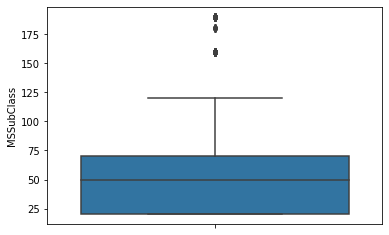

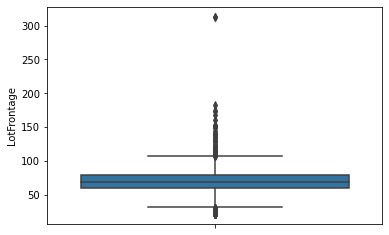

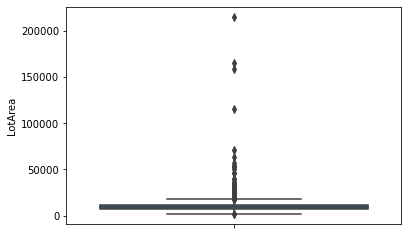

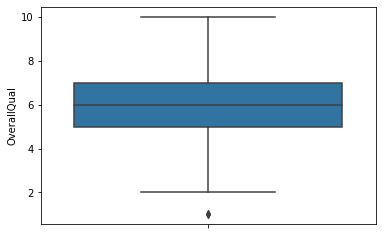

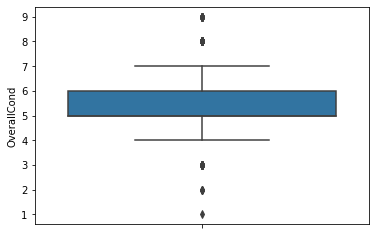

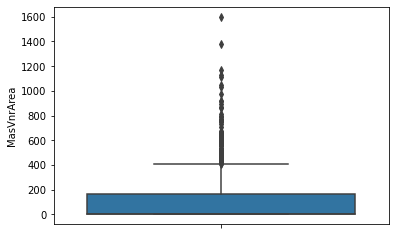

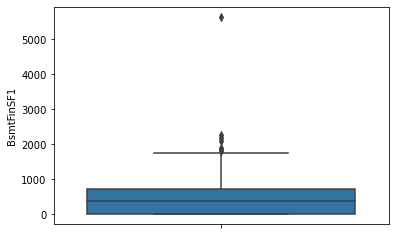

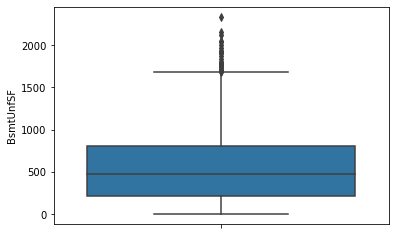

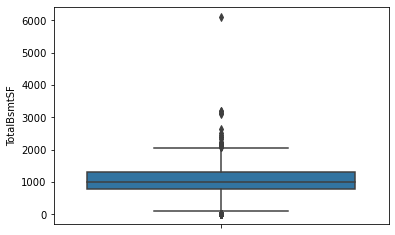

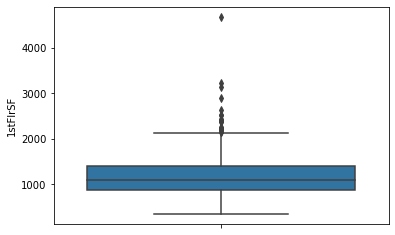

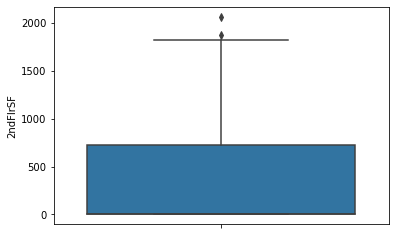

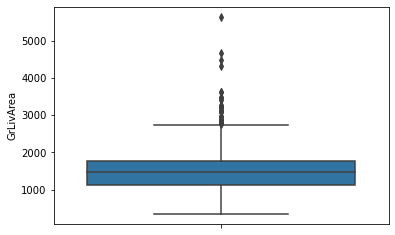

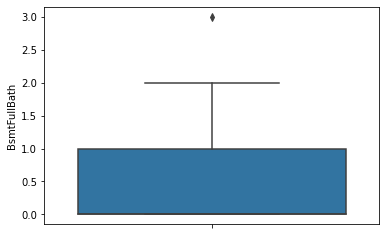

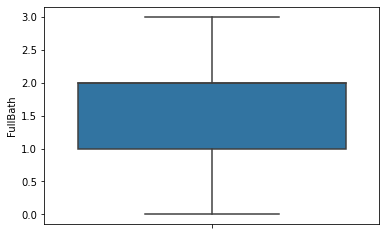

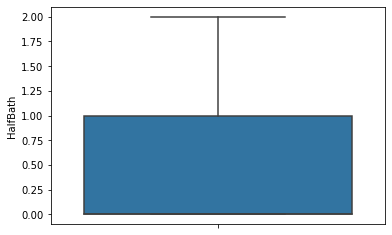

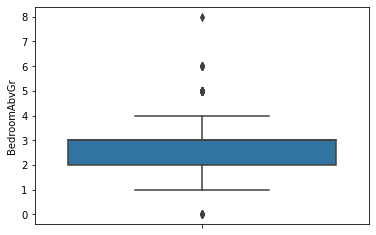

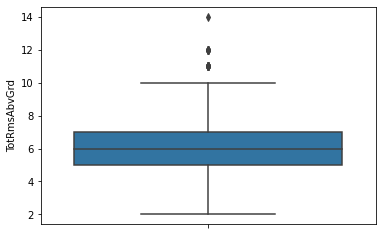

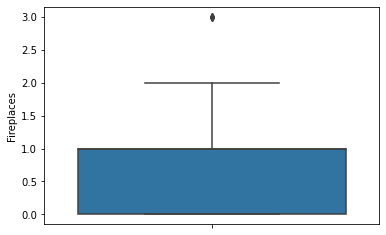

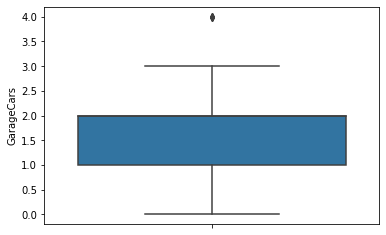

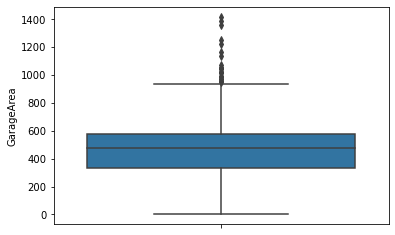

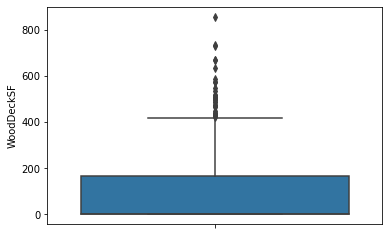

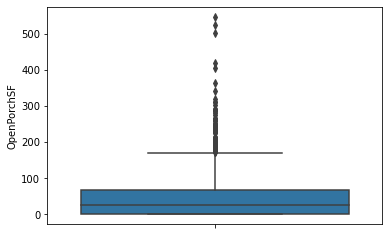

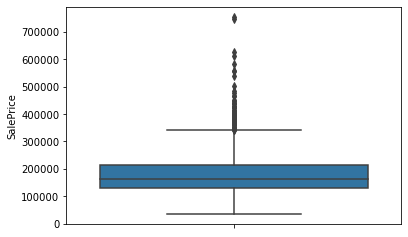

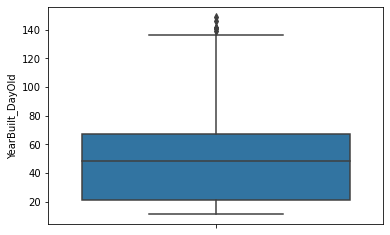

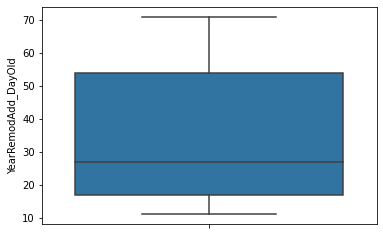

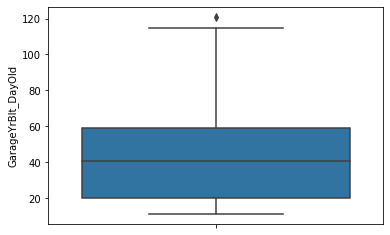

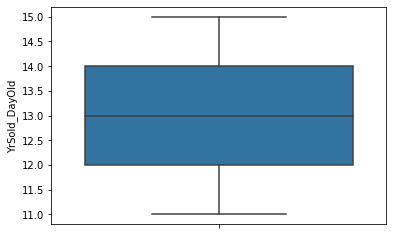

In [40]:
for i ,column in enumerate(num_col):
    numeric_analysis_outlier_check(i,column)

In [41]:
for colz in num_col:
    quan_num_col = house_price_data[colz].quantile(0.98)
    print(colz,' : ',quan_num_col)

MSSubClass  :  188.19999999999936
LotFrontage  :  120.81999999999994
LotArea  :  25251.619999999988
OverallQual  :  9.0
OverallCond  :  8.0
MasVnrArea  :  650.8199999999999
BsmtFinSF1  :  1442.6399999999999
BsmtUnfSF  :  1678.1999999999994
TotalBsmtSF  :  2001.6399999999999
1stFlrSF  :  2072.2799999999997
2ndFlrSF  :  1318.5599999999995
GrLivArea  :  2782.379999999999
BsmtFullBath  :  1.0
FullBath  :  3.0
HalfBath  :  1.0
BedroomAbvGr  :  4.0
TotRmsAbvGrd  :  10.819999999999936
Fireplaces  :  2.0
GarageCars  :  3.0
GarageArea  :  907.4599999999998
WoodDeckSF  :  430.0999999999997
OpenPorchSF  :  240.81999999999994
SalePrice  :  394931.06
YearBuilt_DayOld  :  112.63999999999987
YearRemodAdd_DayOld  :  71.0
GarageYrBlt_DayOld  :  101.0
YrSold_DayOld  :  15.0


#### This are the columns having values beyond 98%

**LotArea<br/>
MasVnrArea<br/>
TotalBsmtSF<br/>
WoodDeckSF<br/>
OpenPorchSF<br/>**

In [42]:
# Removing values beyond 98% 

LotArea_quant = house_price_data['LotArea'].quantile(0.98)
house_price_data = house_price_data[house_price_data["LotArea"] < LotArea_quant]

MasVnrArea_quant = house_price_data['MasVnrArea'].quantile(0.98)
house_price_data = house_price_data[house_price_data["MasVnrArea"] < MasVnrArea_quant]


TotalBsmtSF_quant = house_price_data['TotalBsmtSF'].quantile(0.98)
house_price_data = house_price_data[house_price_data["TotalBsmtSF"] < TotalBsmtSF_quant]


WoodDeckSF_quant = house_price_data['WoodDeckSF'].quantile(0.98)
house_price_data = house_price_data[house_price_data["WoodDeckSF"] < WoodDeckSF_quant]


OpenPorchSF_quant = house_price_data['OpenPorchSF'].quantile(0.98)
house_price_data = house_price_data[house_price_data["OpenPorchSF"] < OpenPorchSF_quant]

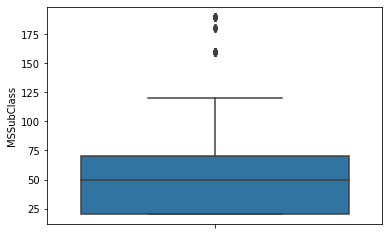

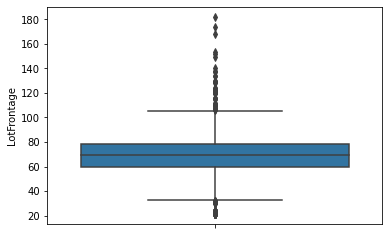

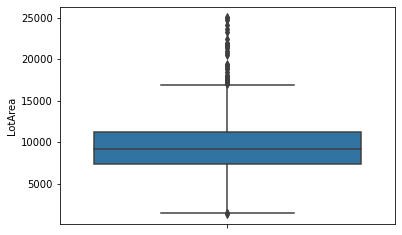

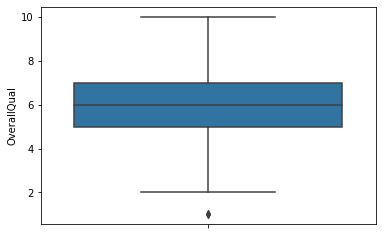

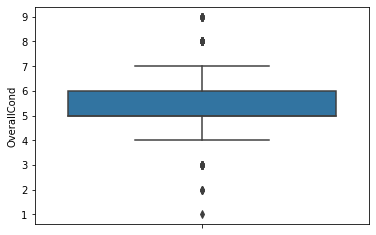

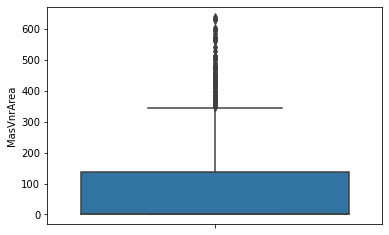

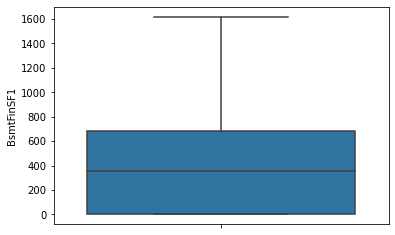

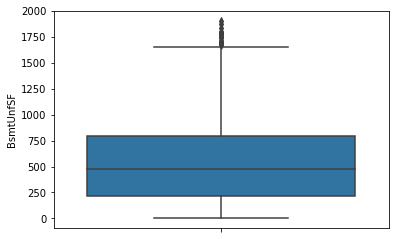

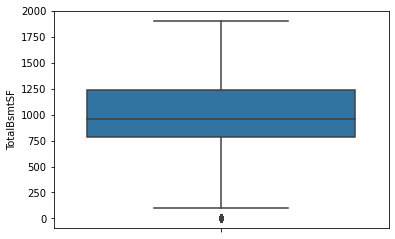

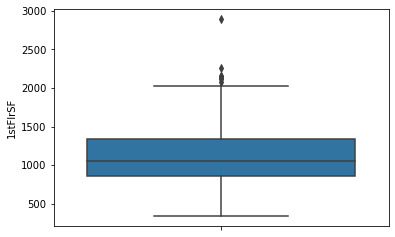

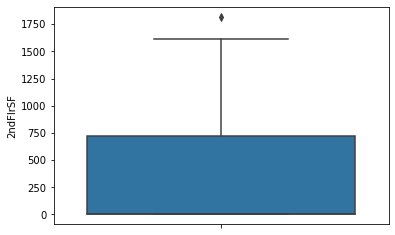

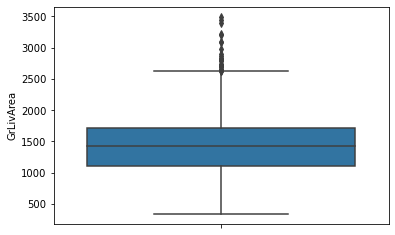

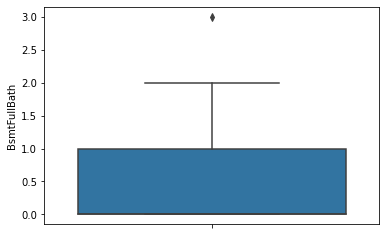

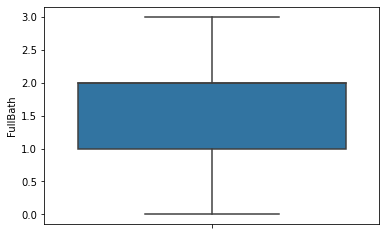

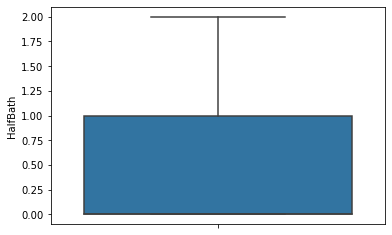

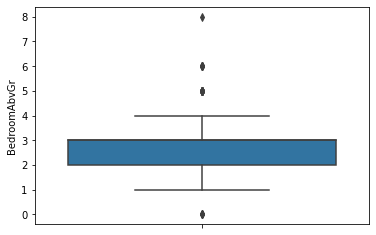

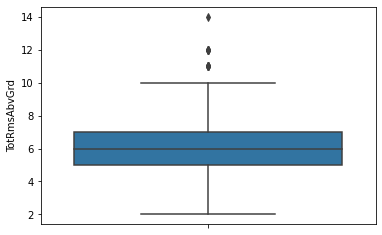

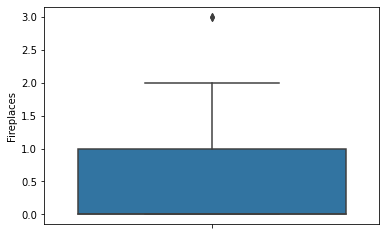

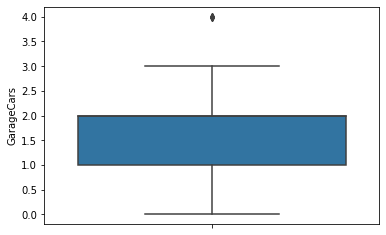

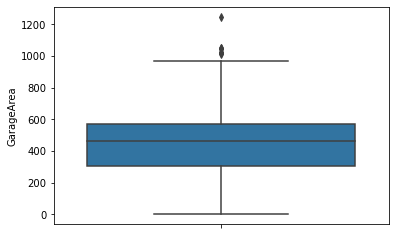

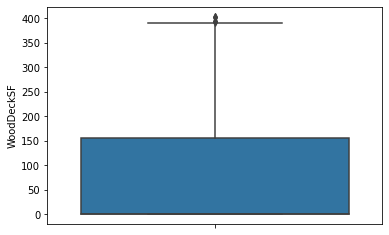

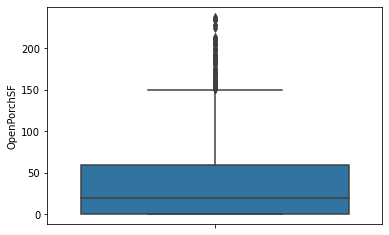

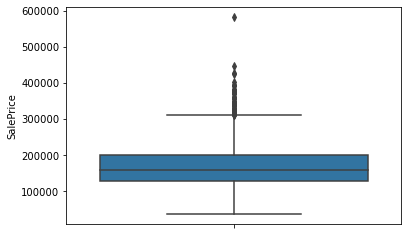

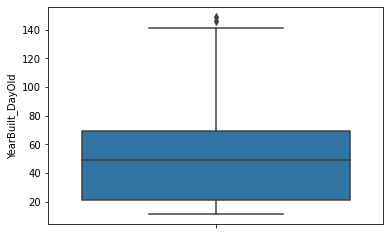

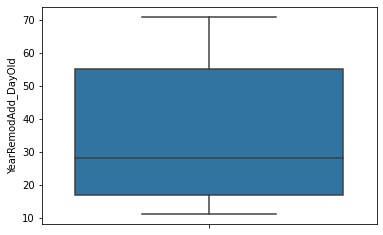

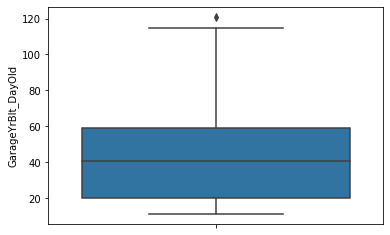

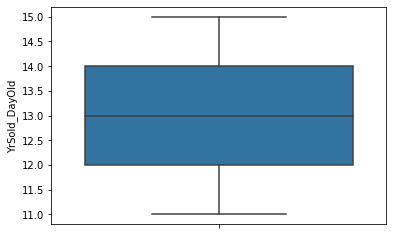

In [43]:
#After removing outliers

for i ,column in enumerate(num_col):
    numeric_analysis_outlier_check(i,column)

## Step 3: Performing Data Visualization

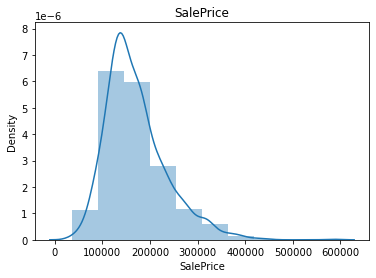

In [44]:
# plotting SalePrice column

plt.title('SalePrice')
sns.distplot(house_price_data['SalePrice'], bins=10)
plt.show()

We can see the ScalePrice having more outliers starting from **400000**<br/>
<br/>
We will remove outlier while using **log1p** from Numpy

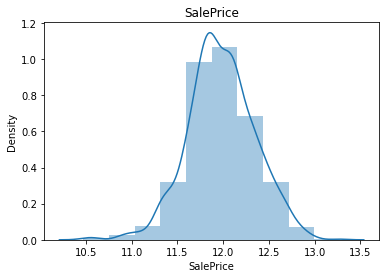

In [45]:
#removing outliers

house_price_data['SalePrice'] = np.log1p(house_price_data['SalePrice'])

#plotting graph after removing outliers

plt.title('SalePrice')
sns.distplot(house_price_data['SalePrice'], bins=10)
plt.show()

In [46]:
# declaring SalePrice as output_cols for plotting purpose

output_cols='SalePrice'

In [47]:
num_col=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice','YearBuilt_DayOld','YearRemodAdd_DayOld','GarageYrBlt_DayOld','YrSold_DayOld']

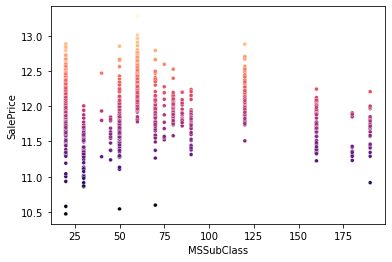

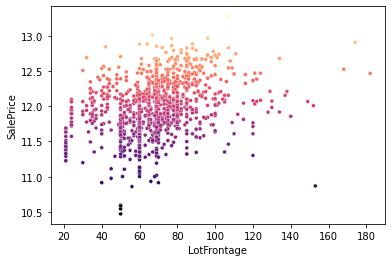

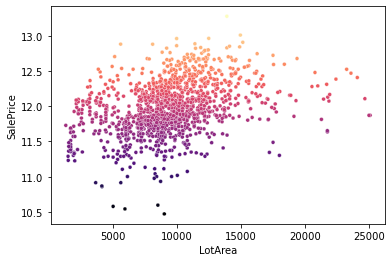

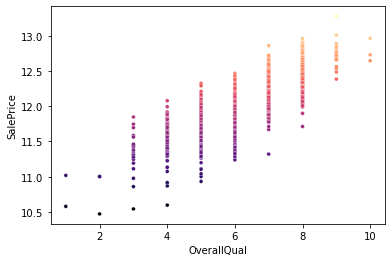

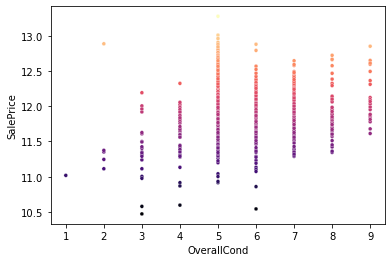

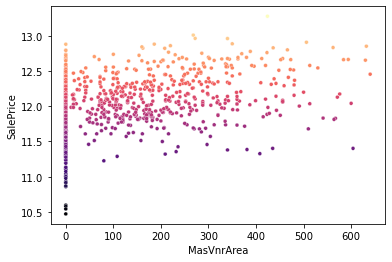

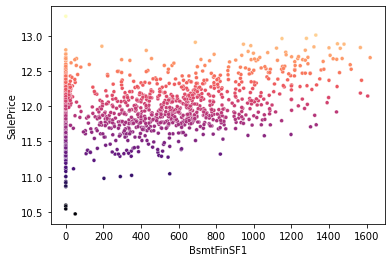

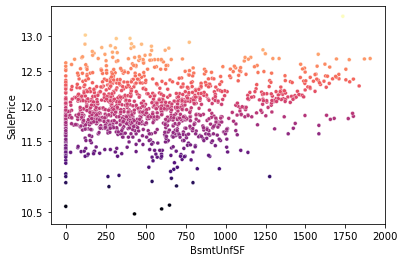

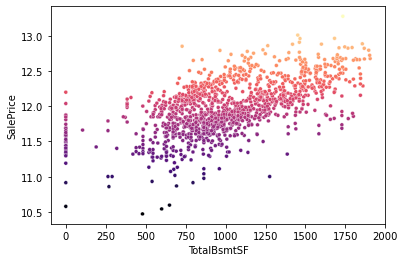

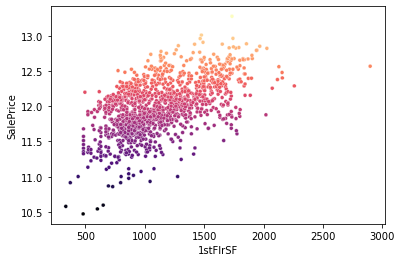

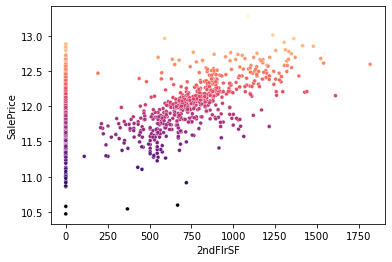

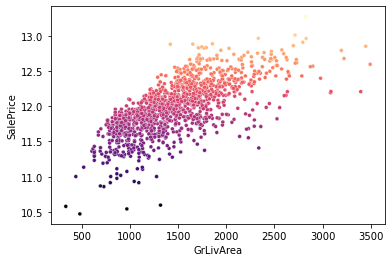

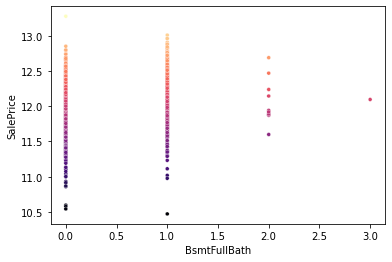

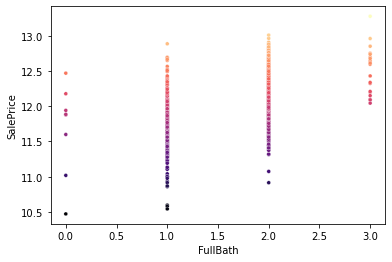

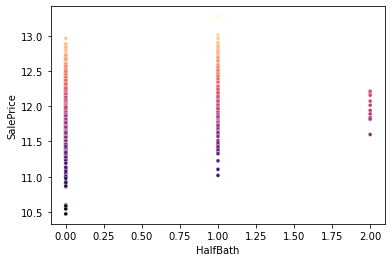

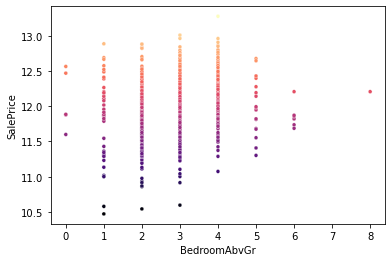

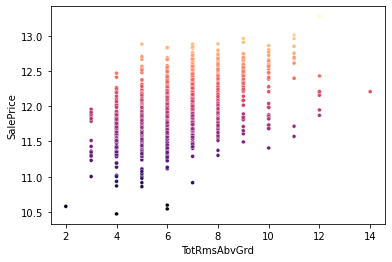

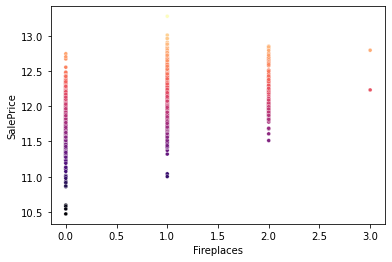

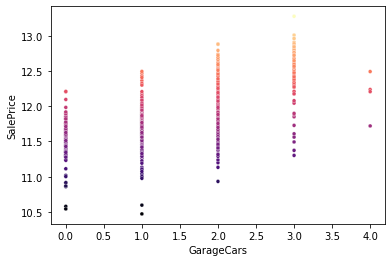

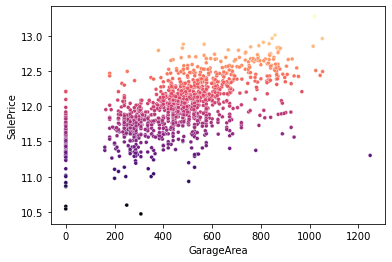

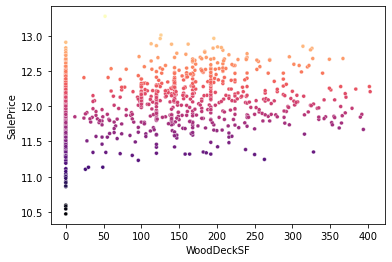

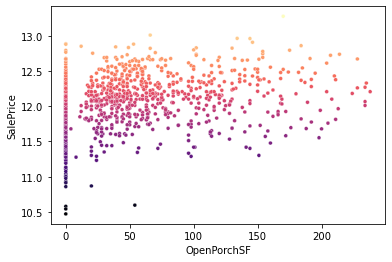

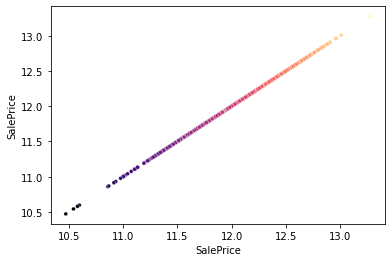

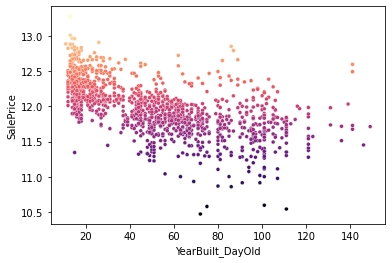

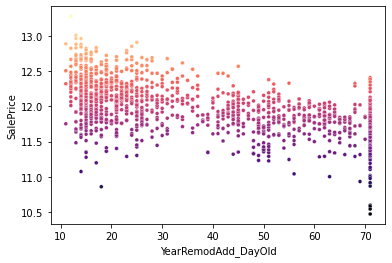

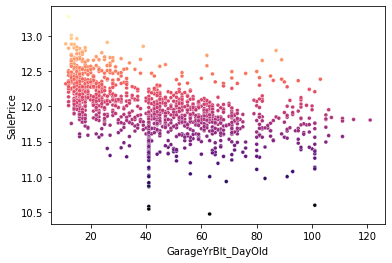

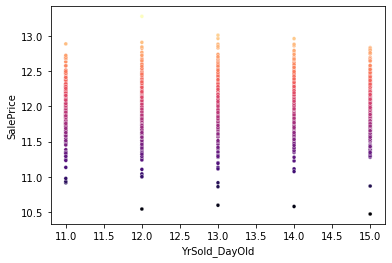

In [48]:
# plotting scatterplot for all numerical columns

for col in num_col:
    sns.scatterplot(x = col,y = output_cols,data=house_price_data,s=15,hue=output_cols,palette="magma", legend=False)
    plt.show()

In [49]:
# plotting boxplot for categorical columns

def categorical_analysis(i,input_col,output_col):
    plt.figure(i)
    var = house_price_data[[input_col]].nunique()
    plt.figure(figsize = (var,var/2))
    order_1= house_price_data[[input_col,output_col]].groupby(by=[input_col])[output_col].median().sort_values(ascending=True)
    sns.boxplot(x=input_col,y = output_col , data = house_price_data[[input_col,output_col]],order = order_1.index,palette='crest')

<Figure size 432x288 with 0 Axes>

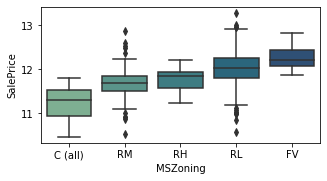

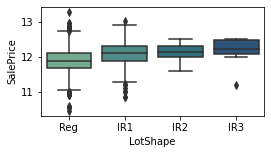

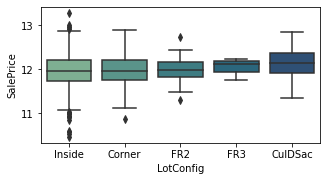

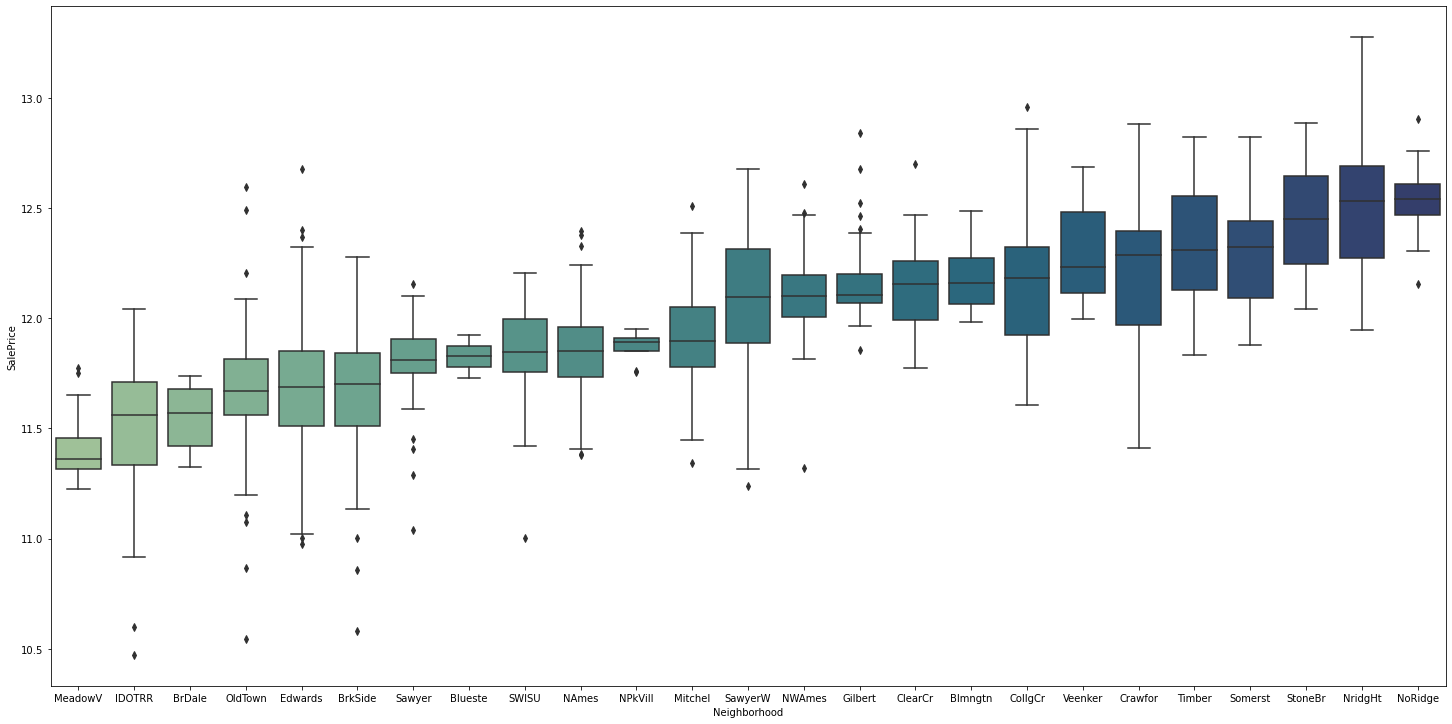

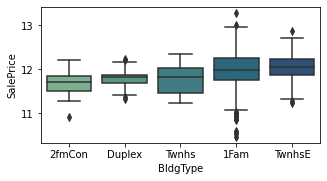

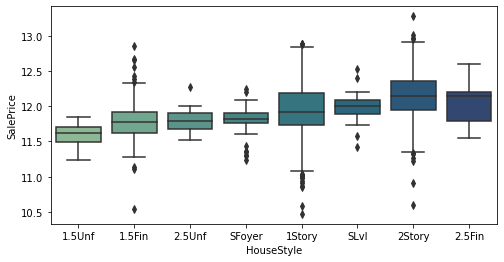

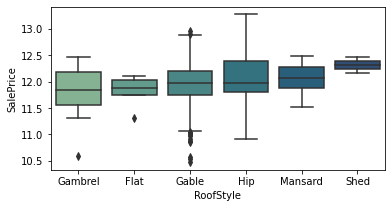

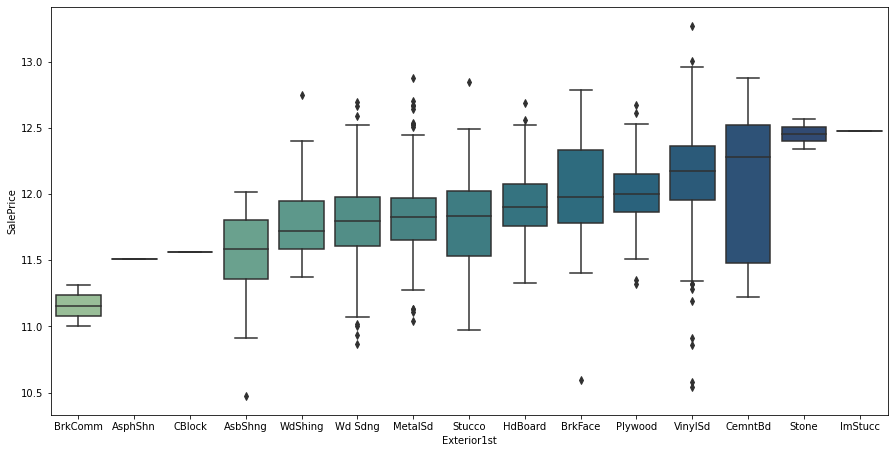

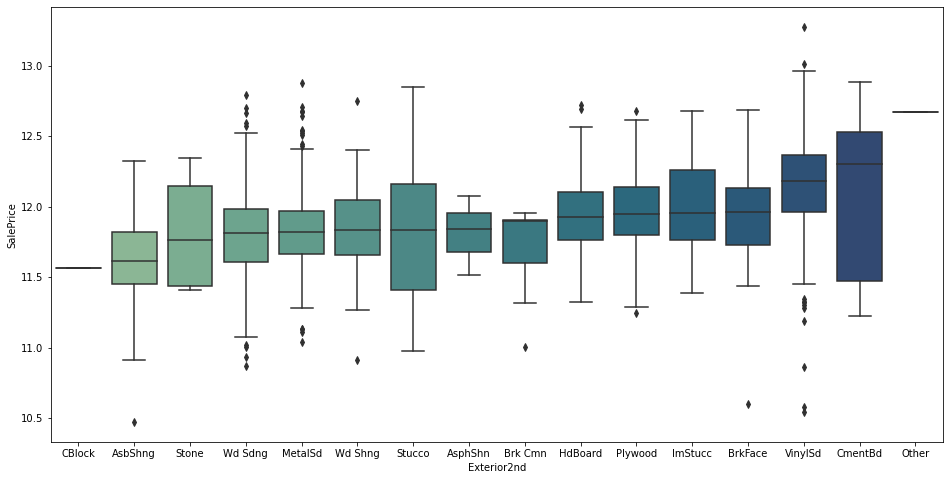

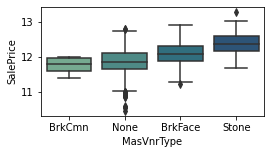

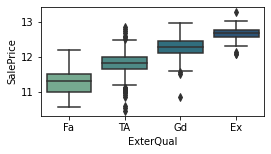

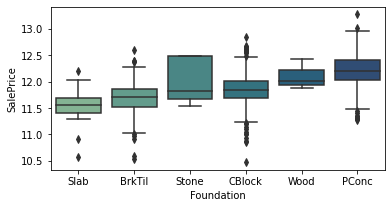

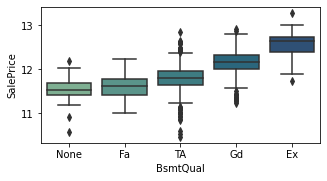

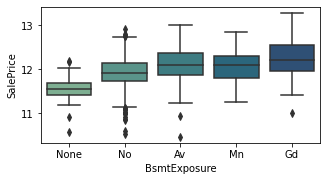

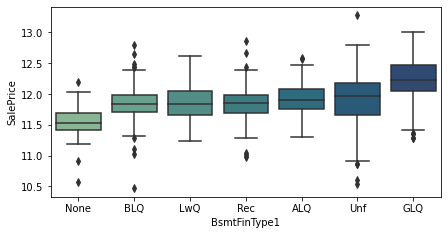

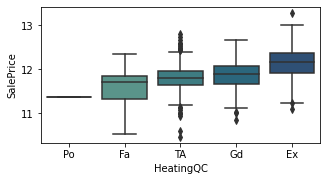

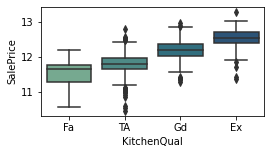

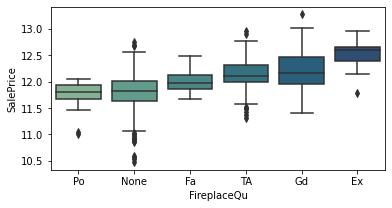

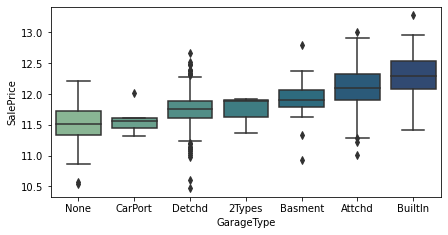

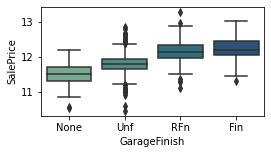

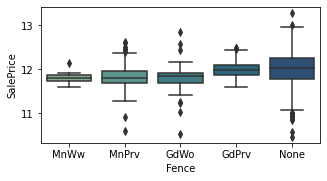

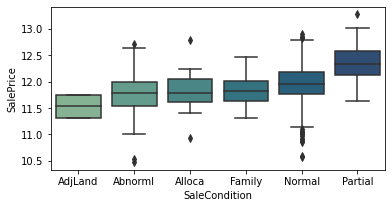

In [50]:
for i ,column in enumerate(categoric_col):
    categorical_analysis(i,column,output_cols)

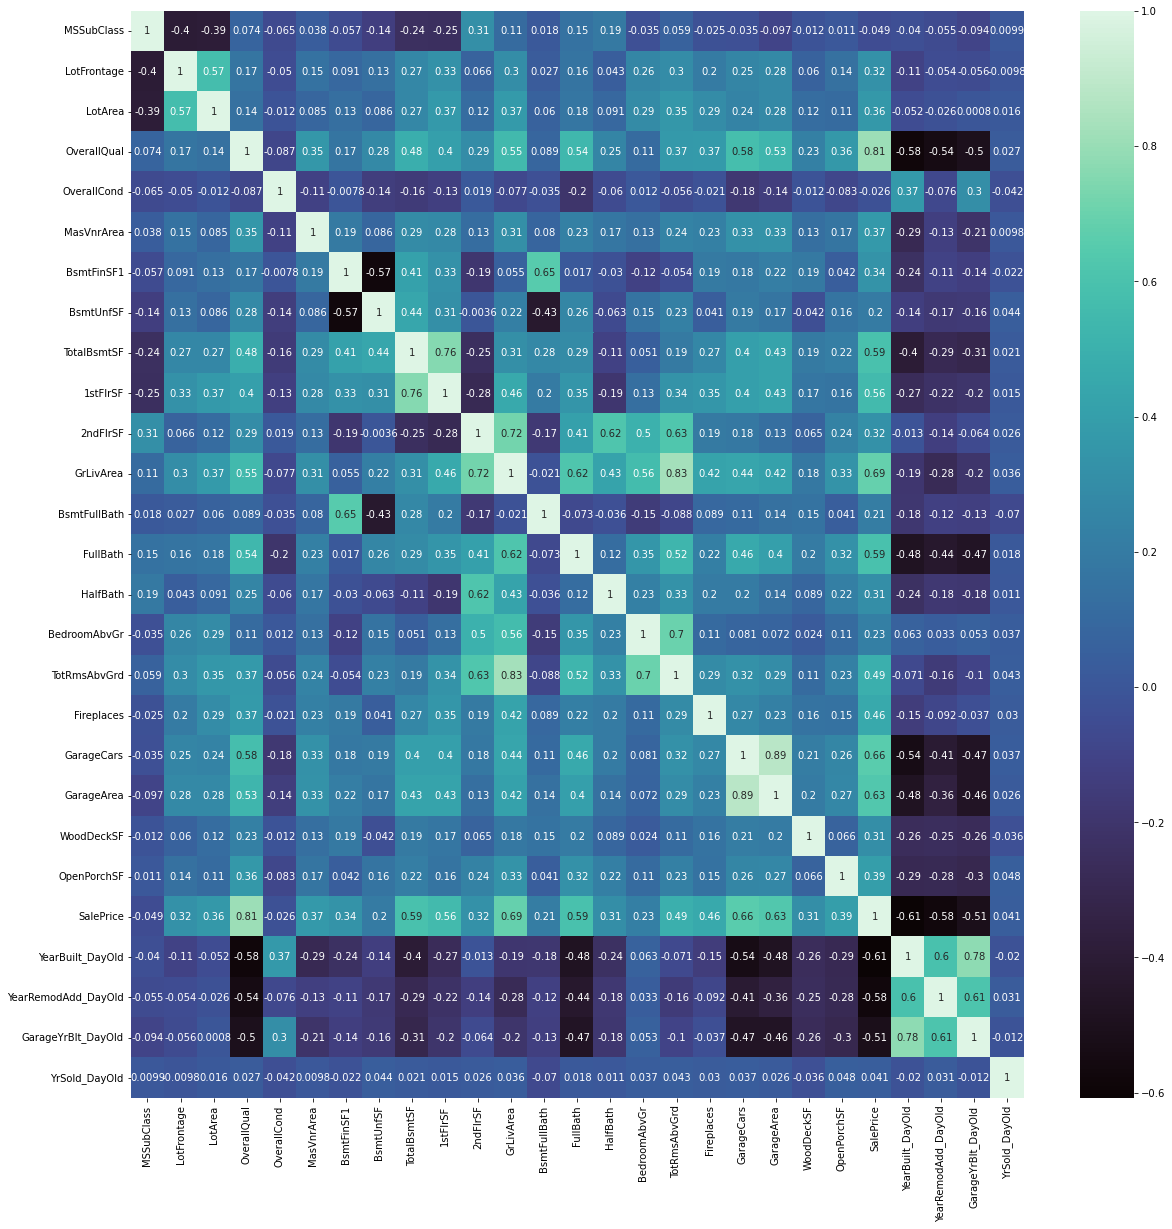

In [51]:
# checking the correlations of the house pricing dataset

plt.figure(figsize=(20,20))

sns.heatmap(house_price_data.corr(),cmap='mako',annot=True)

As per the heatmap this are the below columns showing highly correlations

GrLivArea and TotRmsAbvGrd - **83%** <br/><br/>
GarageCars and GarageArea - **89%**


We will remove the highly correlated columns

In [52]:
#Removing the highly correlated Columns

house_price_data.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [53]:
# checking the shape of the dataset after removing some columns

house_price_data.shape

(1317, 47)

In [54]:
# Checking whether any null/NA datas are available

house_price_data.isna().sum()

MSSubClass             0
MSZoning               0
LotFrontage            0
LotArea                0
LotShape               0
LotConfig              0
Neighborhood           0
BldgType               0
HouseStyle             0
OverallQual            0
OverallCond            0
RoofStyle              0
Exterior1st            0
Exterior2nd            0
MasVnrType             0
MasVnrArea             0
ExterQual              0
Foundation             0
BsmtQual               0
BsmtExposure           0
BsmtFinType1           0
BsmtFinSF1             0
BsmtUnfSF              0
TotalBsmtSF            0
HeatingQC              0
1stFlrSF               0
2ndFlrSF               0
GrLivArea              0
BsmtFullBath           0
FullBath               0
HalfBath               0
BedroomAbvGr           0
KitchenQual            0
Fireplaces             0
FireplaceQu            0
GarageType             0
GarageFinish           0
GarageCars             0
WoodDeckSF             0
OpenPorchSF            0


## Step 4 :  Data Preparation

In [55]:

# creating categorical into numerical

house_price_data['LotShape'] = house_price_data['LotShape'].map({'Reg':3, 'IR1': 2,'IR2': 1, 'IR3': 0})
house_price_data['ExterQual'] = house_price_data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house_price_data['BsmtQual'] = house_price_data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_price_data['BsmtExposure'] = house_price_data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
house_price_data['BsmtFinType1'] = house_price_data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
house_price_data['HeatingQC'] = house_price_data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_price_data['KitchenQual'] = house_price_data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_price_data['FireplaceQu'] = house_price_data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_price_data['GarageFinish'] = house_price_data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
house_price_data['BldgType'] = house_price_data['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
house_price_data['HouseStyle'] = house_price_data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
house_price_data['Fence'] = house_price_data['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
house_price_data['LotConfig'] = house_price_data['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
house_price_data['MasVnrType'] = house_price_data['MasVnrType'].map({'BrkCmn': 4, 'BrkFace': 3, 'CBlock': 2, 'Stone': 1, 'None': 0 })
house_price_data['SaleCondition'] = house_price_data['SaleCondition'].map({'Normal': 6, 'Partial': 5, 'Abnorml': 4, 'Family': 3, 
                                                                   'Alloca': 2, 'AdjLand': 1, 'None': 0})
house_price_data.head()

MSSubClass MSZoning  LotFrontage  LotArea  LotShape  LotConfig  \
0          60       RL         65.0     8450         3          5   
1          20       RL         80.0     9600         3          2   
2          60       RL         68.0    11250         2          5   
3          70       RL         60.0     9550         2          4   
4          60       RL         84.0    14260         2          2   

  Neighborhood  BldgType  HouseStyle  OverallQual  ...  GarageCars WoodDeckSF  \
0      CollgCr         1           4            7  ...           2          0   
1      Veenker         1           1            6  ...           2        298   
2      CollgCr         1           4            7  ...           2          0   
3      Crawfor         1           4            7  ...           3          0   
4      NoRidge         1           4            8  ...           3        192   

  OpenPorchSF Fence  SaleCondition  SalePrice  YearBuilt_DayOld  \
0          61     0              6  12.247699                18   
1           0     0              6  12.109016                45   
2          42     0              6  12.317171                20   
3          35     0              4  11.849405               106   
4          84     0              6  12.429220                21   

  YearRemodAdd_DayOld  GarageYrBlt_DayOld  YrSold_DayOld  
0                  18                  18             13  
1                  45                  45             14  
2                  19                  20             13  
3                  51                  23             15  
4                  21                  21             13  

[5 rows x 47 columns]

In [56]:
house_price_data.info()
house_price_data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 1458
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSubClass           1317 non-null   int64  
 1   MSZoning             1317 non-null   object 
 2   LotFrontage          1317 non-null   float64
 3   LotArea              1317 non-null   int64  
 4   LotShape             1317 non-null   int64  
 5   LotConfig            1317 non-null   int64  
 6   Neighborhood         1317 non-null   object 
 7   BldgType             1317 non-null   int64  
 8   HouseStyle           1317 non-null   int64  
 9   OverallQual          1317 non-null   int64  
 10  OverallCond          1317 non-null   int64  
 11  RoofStyle            1317 non-null   object 
 12  Exterior1st          1317 non-null   object 
 13  Exterior2nd          1317 non-null   object 
 14  MasVnrType           1317 non-null   int64  
 15  MasVnrArea           1317 non-null   f

(1317, 47)

**Creating Dummies**

In [57]:
# creating dummies from categorical columns

house_price_dummy = pd.get_dummies(house_price_data[['MSZoning',
'Neighborhood',
'RoofStyle',
'Exterior1st',
'Exterior2nd',
'Foundation',
'GarageType'
]],drop_first=True)

In [58]:
# concatenating the dummy dataframe with original dataframe

house_price_data = pd.concat([house_price_data,house_price_dummy],axis = 'columns')

In [59]:
house_price_data.head()

MSSubClass MSZoning  LotFrontage  LotArea  LotShape  LotConfig  \
0          60       RL         65.0     8450         3          5   
1          20       RL         80.0     9600         3          2   
2          60       RL         68.0    11250         2          5   
3          70       RL         60.0     9550         2          4   
4          60       RL         84.0    14260         2          2   

  Neighborhood  BldgType  HouseStyle  OverallQual  ...  Foundation_PConc  \
0      CollgCr         1           4            7  ...                 1   
1      Veenker         1           1            6  ...                 0   
2      CollgCr         1           4            7  ...                 1   
3      Crawfor         1           4            7  ...                 0   
4      NoRidge         1           4            8  ...                 1   

  Foundation_Slab Foundation_Stone Foundation_Wood  GarageType_Attchd  \
0               0                0               0                  1   
1               0                0               0                  1   
2               0                0               0                  1   
3               0                0               0                  0   
4               0                0               0                  1   

   GarageType_Basment  GarageType_BuiltIn GarageType_CarPort  \
0                   0                   0                  0   
1                   0                   0                  0   
2                   0                   0                  0   
3                   0                   0                  0   
4                   0                   0                  0   

   GarageType_Detchd  GarageType_None  
0                  0                0  
1                  0                0  
2                  0                0  
3                  1                0  
4                  0                0  

[5 rows x 120 columns]

In [60]:
#removing the original columns after creating dummies

house_price_data = house_price_data.drop(['MSZoning',
'Neighborhood',
'RoofStyle',
'Exterior1st',
'Exterior2nd',
'Foundation',
'GarageType'
],axis = 1)

In [61]:
house_price_data.head()

MSSubClass  LotFrontage  LotArea  LotShape  LotConfig  BldgType  \
0          60         65.0     8450         3          5         1   
1          20         80.0     9600         3          2         1   
2          60         68.0    11250         2          5         1   
3          70         60.0     9550         2          4         1   
4          60         84.0    14260         2          2         1   

   HouseStyle  OverallQual  OverallCond  MasVnrType  ...  Foundation_PConc  \
0           4            7            5           3  ...                 1   
1           1            6            8           0  ...                 0   
2           4            7            5           3  ...                 1   
3           4            7            5           0  ...                 0   
4           4            8            5           3  ...                 1   

   Foundation_Slab  Foundation_Stone  Foundation_Wood  GarageType_Attchd  \
0                0                 0                0                  1   
1                0                 0                0                  1   
2                0                 0                0                  1   
3                0                 0                0                  0   
4                0                 0                0                  1   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   GarageType_Detchd  GarageType_None  
0                  0                0  
1                  0                0  
2                  0                0  
3                  1                0  
4                  0                0  

[5 rows x 113 columns]

In [62]:
house_price_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 1458
Columns: 113 entries, MSSubClass to GarageType_None
dtypes: float64(3), int32(1), int64(36), uint8(73)
memory usage: 542.9 KB


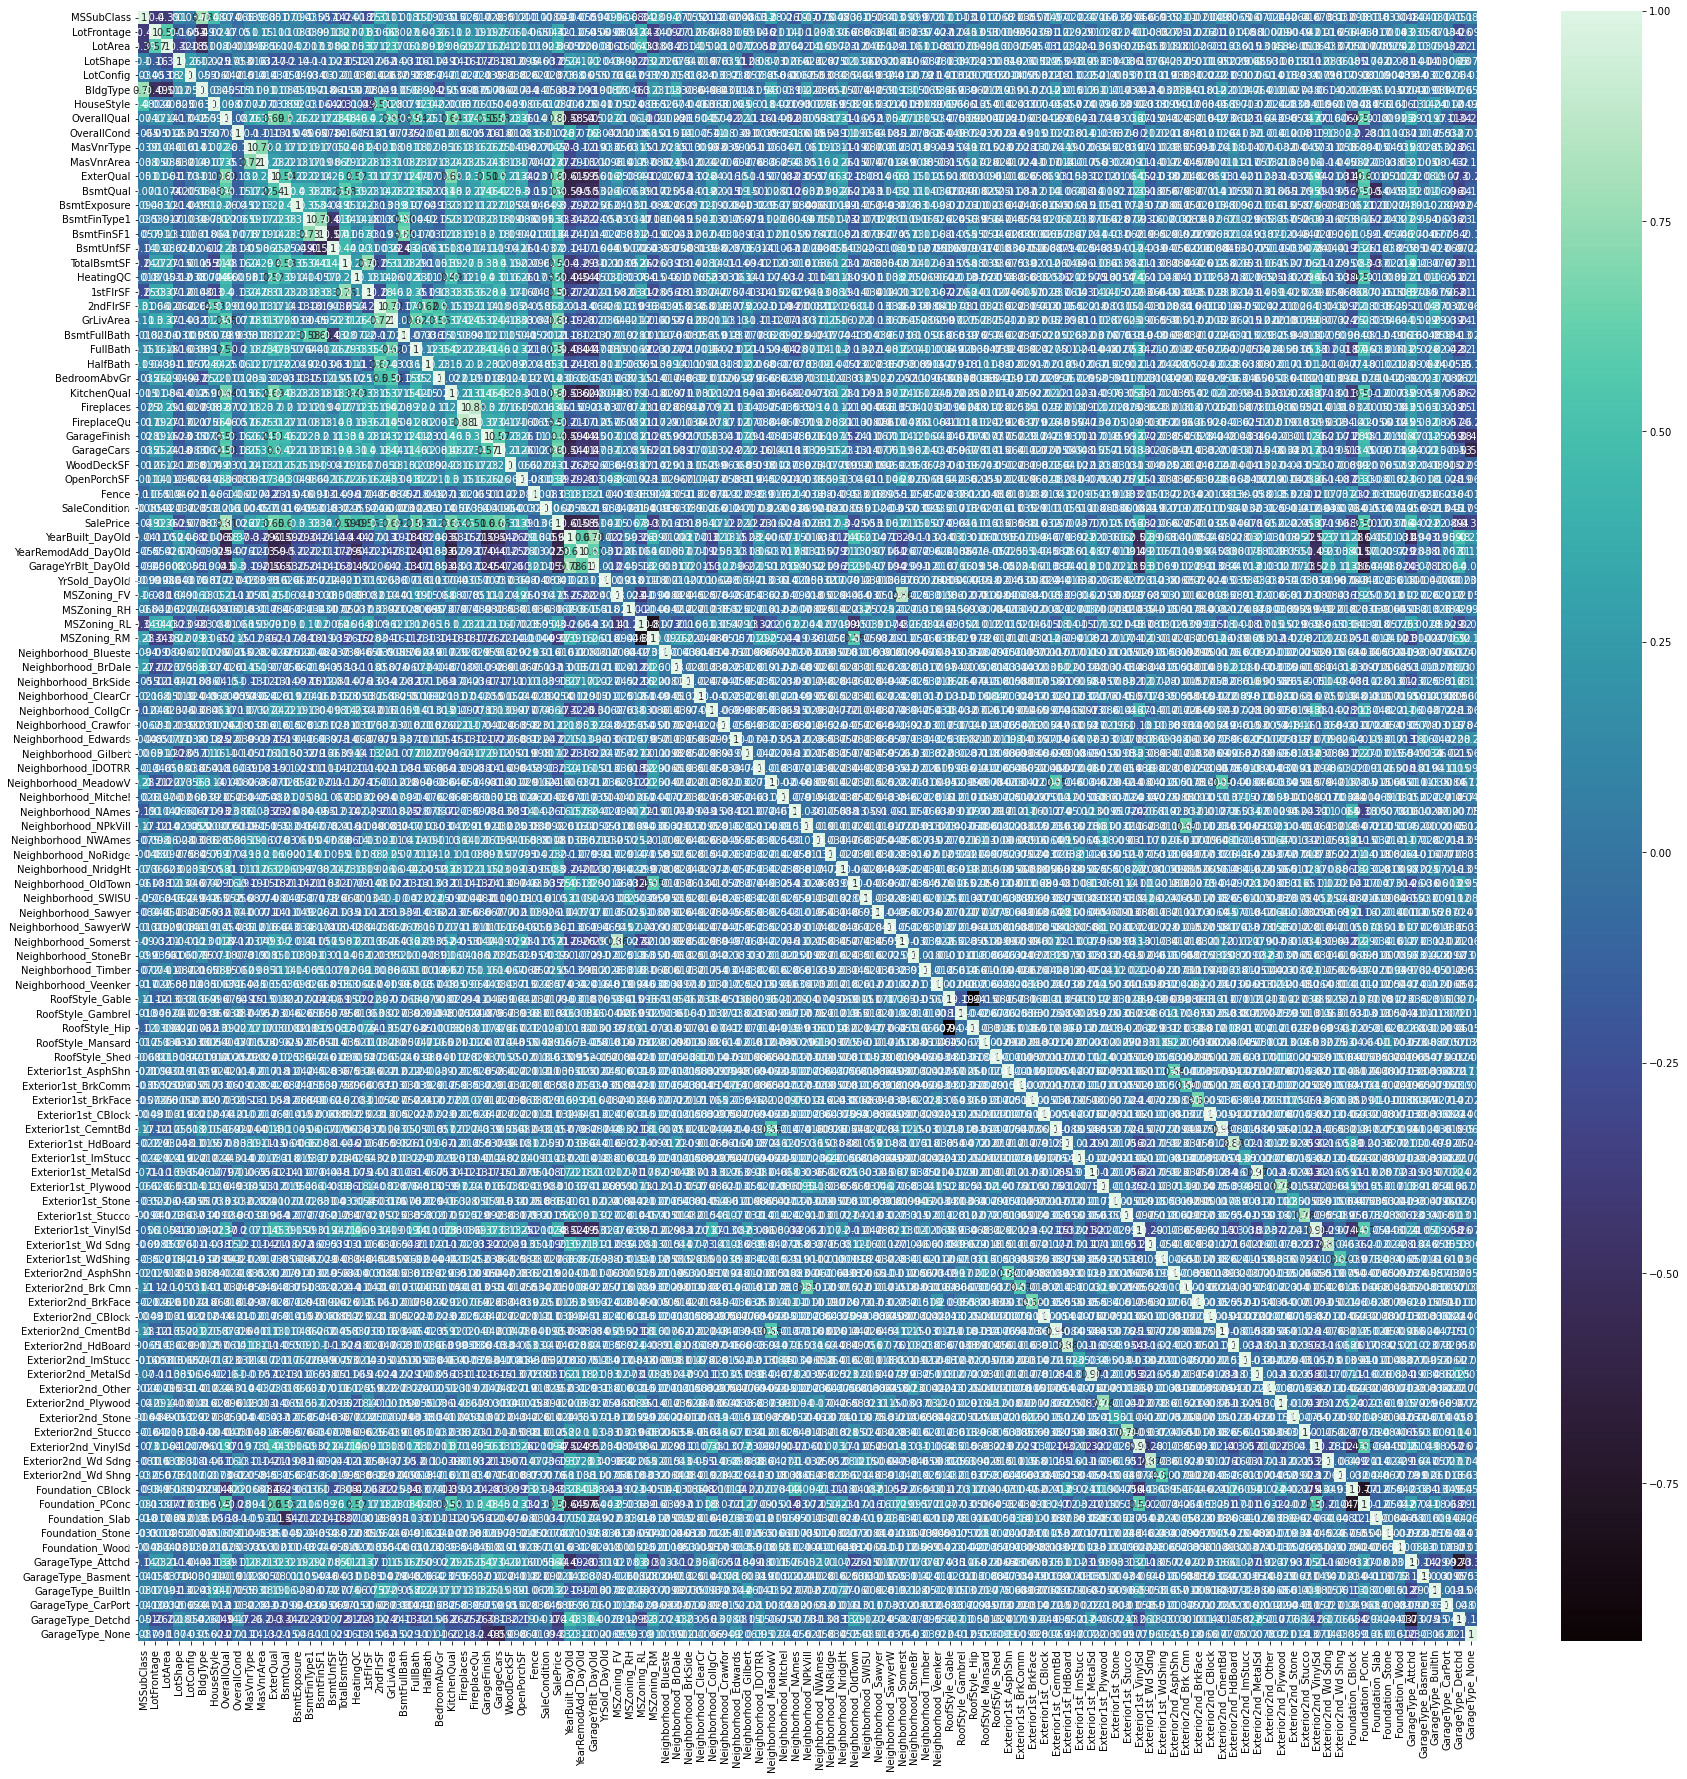

In [63]:
# checking the coefficients

plt.figure(figsize=(30,30))

sns.heatmap(house_price_data.corr(),cmap='mako',annot=True)

## Step 5 : Train Test Split

In [64]:
# dropping SalePrice in X

X = house_price_data.drop(['SalePrice'],axis=1)

X.head()

MSSubClass  LotFrontage  LotArea  LotShape  LotConfig  BldgType  \
0          60         65.0     8450         3          5         1   
1          20         80.0     9600         3          2         1   
2          60         68.0    11250         2          5         1   
3          70         60.0     9550         2          4         1   
4          60         84.0    14260         2          2         1   

   HouseStyle  OverallQual  OverallCond  MasVnrType  ...  Foundation_PConc  \
0           4            7            5           3  ...                 1   
1           1            6            8           0  ...                 0   
2           4            7            5           3  ...                 1   
3           4            7            5           0  ...                 0   
4           4            8            5           3  ...                 1   

   Foundation_Slab  Foundation_Stone  Foundation_Wood  GarageType_Attchd  \
0                0                 0                0                  1   
1                0                 0                0                  1   
2                0                 0                0                  1   
3                0                 0                0                  0   
4                0                 0                0                  1   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   GarageType_Detchd  GarageType_None  
0                  0                0  
1                  0                0  
2                  0                0  
3                  1                0  
4                  0                0  

[5 rows x 112 columns]

In [65]:
# Declaring SalePrice in y

y = house_price_data['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [66]:
#Scaling columns of X

scale_cols = X.columns

X = pd.DataFrame(scale(X))

X.columns = scale_cols

X.columns


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'MasVnrType',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=112)

In [67]:
# Creating Train and Test for X and y with size 70% and 30%

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,test_size=0.3,random_state = 42)

**Linear Regression**

In [68]:
# Loading Linear Regression 
lm = LinearRegression()

# Fitting X train and y train
lm.fit(X_train, y_train)


LinearRegression()

In [69]:
# Predicting the X train and X test

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

house_price_lr_metric = []

# calculating r2 square in Train and Test for Linear Regression
print("R2 Square - Linear Regression")
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train : ",r2_train_lr)
house_price_lr_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test : ",r2_test_lr)
house_price_lr_metric.append(r2_test_lr)

print('_____________________________________')

#Calculating Residual Sum Of Square (RSS) of Train and Test for Linear Regression

print("Residual Sum Of Square (RSS) - Linear Regression")
rss_train_lr = np.sum(np.square(y_train - y_pred_train))
print("Train : ",rss_train_lr)
house_price_lr_metric.append(rss_train_lr)

rss_test_lr = np.sum(np.square(y_test - y_pred_test))
print("Test : ",rss_test_lr)
house_price_lr_metric.append(rss_test_lr)

print('_____________________________________')

# Calculating Mean Squared Error(MSE) of Train and Tes for Linear Regression

print("Mean Squared Error (MSE) - Linear Regression")
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train : ",mse_train_lr)
house_price_lr_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test : ",mse_test_lr)
house_price_lr_metric.append(mse_test_lr**0.5)

R2 Square - Linear Regression
Train :  0.9226141855960696
Test :  0.9002349356341915
_____________________________________
Residual Sum Of Square (RSS) - Linear Regression
Train :  9.465860395292218
Test :  5.438453719532171
_____________________________________
Mean Squared Error (MSE) - Linear Regression
Train :  0.01027780716101218
Test :  0.013733468988717603


In [70]:
#printing coefficients of linear regression

print(lm.coef_)

[ 2.53651762e-03  8.32174456e-03  2.04656765e-02 -1.14706622e-03
  2.99837830e-03 -2.91260388e-02  2.10327201e-03  6.78018103e-02
  4.29967936e-02 -5.33507164e-04  1.67565182e-03 -4.15465791e-03
  7.82178903e-03  1.60068475e-02  4.22589187e-03  2.35618978e-02
 -1.05473044e-02  5.16769169e-02  1.49702980e-02  1.66228451e-03
 -1.03180610e-03  1.05018049e-01  5.36042314e-03  9.97921961e-03
  1.39615601e-02  2.12415610e-03  1.17134056e-02  4.50031016e-03
  1.04592760e-02  1.01370212e-02  2.59802924e-02  6.49499159e-03
  3.05265185e-03 -3.93967060e-03  1.03784143e-02 -5.46336682e-02
 -1.88966011e-02 -1.43833423e-02  7.05706722e-03  8.52704910e-02
  4.31468348e-02  1.71639673e-01  1.37160965e-01  1.48862786e-03
 -3.15964408e-03  5.18055598e-03 -2.43904243e-03 -1.23502903e-02
  1.59515025e-02 -1.90741047e-02 -1.75579323e-02  1.80246071e-03
 -1.18873998e-02 -1.45418182e-02 -1.66187479e-02  9.12433537e-04
 -1.51291484e-02 -3.08965373e-03  9.26833042e-03 -1.03528076e-02
 -2.53939727e-03 -1.43707

**RFE**

In [71]:
#running RFE for 50 columns

rfe = RFE(lm,50)

rfe = rfe.fit(X_train, y_train)

In [72]:
# Assigning the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assigning the 50 features selected using RFE to a dataframe

house_price_data_temp = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
house_price_data_temp = house_price_data_temp.loc[house_price_data_temp['rfe_support'] == True]
house_price_data_temp.reset_index(drop=True, inplace=True)

house_price_data_temp

Variable  rfe_support  rfe_ranking
0                LotArea         True            1
1               BldgType         True            1
2            OverallQual         True            1
3            OverallCond         True            1
4           BsmtExposure         True            1
5             BsmtFinSF1         True            1
6              BsmtUnfSF         True            1
7            TotalBsmtSF         True            1
8              HeatingQC         True            1
9              GrLivArea         True            1
10              FullBath         True            1
11              HalfBath         True            1
12           KitchenQual         True            1
13           FireplaceQu         True            1
14          GarageFinish         True            1
15            GarageCars         True            1
16         SaleCondition         True            1
17      YearBuilt_DayOld         True            1
18   YearRemodAdd_DayOld         True            1
19    GarageYrBlt_DayOld         True            1
20           MSZoning_FV         True            1
21           MSZoning_RH         True            1
22           MSZoning_RL         True            1
23           MSZoning_RM         True            1
24  Neighborhood_CollgCr         True            1
25  Neighborhood_Crawfor         True            1
26  Neighborhood_Edwards         True            1
27  Neighborhood_Gilbert         True            1
28  Neighborhood_MeadowV         True            1
29  Neighborhood_Mitchel         True            1
30    Neighborhood_NAmes         True            1
31   Neighborhood_NWAmes         True            1
32  Neighborhood_NridgHt         True            1
33  Neighborhood_OldTown         True            1
34   Neighborhood_Sawyer         True            1
35  Neighborhood_Somerst         True            1
36  Neighborhood_StoneBr         True            1
37       RoofStyle_Gable         True            1
38     RoofStyle_Gambrel         True            1
39         RoofStyle_Hip         True            1
40        RoofStyle_Shed         True            1
41   Exterior1st_BrkComm         True            1
42   Exterior1st_BrkFace         True            1
43   Exterior1st_Wd Sdng         True            1
44   Exterior2nd_MetalSd         True            1
45   Exterior2nd_Wd Sdng         True            1
46     Foundation_CBlock         True            1
47      Foundation_PConc         True            1
48       Foundation_Slab         True            1
49       GarageType_None         True            1

In [73]:
# Assigning the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [74]:
#Associating the new 50 columns to train and test

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [75]:
# checking the columns for X train
X_train.columns

Index(['LotArea', 'BldgType', 'OverallQual', 'OverallCond', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea',
       'FullBath', 'HalfBath', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
       'GarageCars', 'SaleCondition', 'YearBuilt_DayOld',
       'YearRemodAdd_DayOld', 'GarageYrBlt_DayOld', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior2nd_Wd Sdng',
       'Foundation_CBlock', 'Foundation_PConc', 

In [76]:
# checking the columns for X test

X_test.columns

Index(['LotArea', 'BldgType', 'OverallQual', 'OverallCond', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea',
       'FullBath', 'HalfBath', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
       'GarageCars', 'SaleCondition', 'YearBuilt_DayOld',
       'YearRemodAdd_DayOld', 'GarageYrBlt_DayOld', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior2nd_Wd Sdng',
       'Foundation_CBlock', 'Foundation_PConc', 

In [77]:
print(lm.coef_)

[ 2.53651762e-03  8.32174456e-03  2.04656765e-02 -1.14706622e-03
  2.99837830e-03 -2.91260388e-02  2.10327201e-03  6.78018103e-02
  4.29967936e-02 -5.33507164e-04  1.67565182e-03 -4.15465791e-03
  7.82178903e-03  1.60068475e-02  4.22589187e-03  2.35618978e-02
 -1.05473044e-02  5.16769169e-02  1.49702980e-02  1.66228451e-03
 -1.03180610e-03  1.05018049e-01  5.36042314e-03  9.97921961e-03
  1.39615601e-02  2.12415610e-03  1.17134056e-02  4.50031016e-03
  1.04592760e-02  1.01370212e-02  2.59802924e-02  6.49499159e-03
  3.05265185e-03 -3.93967060e-03  1.03784143e-02 -5.46336682e-02
 -1.88966011e-02 -1.43833423e-02  7.05706722e-03  8.52704910e-02
  4.31468348e-02  1.71639673e-01  1.37160965e-01  1.48862786e-03
 -3.15964408e-03  5.18055598e-03 -2.43904243e-03 -1.23502903e-02
  1.59515025e-02 -1.90741047e-02 -1.75579323e-02  1.80246071e-03
 -1.18873998e-02 -1.45418182e-02 -1.66187479e-02  9.12433537e-04
 -1.51291484e-02 -3.08965373e-03  9.26833042e-03 -1.03528076e-02
 -2.53939727e-03 -1.43707

## Model Building and Evaluation

### A . Ridge Regression

In [78]:
# list of alphas for Ridge

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Loadinf Ridge

ridge = Ridge()

# cross validation with fold 5 

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  
# Fitting the Ridge model cv with X train and Y train 
ridge_model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
# Checking the best estimator of Ridge

print(ridge_model_cv.best_estimator_)

Ridge(alpha=4.0)


In [80]:
# Displaying the mean score of trainf and test in ridge

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
15         4.0         -0.073018        -0.079957                1
14         3.0         -0.072981        -0.079965                2
13         2.0         -0.072959        -0.079972                3
16         5.0         -0.073062        -0.079972                4
12         1.0         -0.072960        -0.079981                5
11         0.9         -0.072960        -0.079982                6
10         0.8         -0.072961        -0.079983                7
9          0.7         -0.072962        -0.079984                8
8          0.6         -0.072962        -0.079986                9
7          0.5         -0.072963        -0.079988               10
6          0.4         -0.072964        -0.079989               11
5          0.3         -0.072965        -0.079991               12
4          0.2         -0.072966        -0.079993               13
3          0.1         -0.072967        -0.079994               14
2         0.01         -0.072968        -0.079996               15
1        0.001         -0.072969        -0.079996               16
0       0.0001         -0.072969        -0.079996               17
17         6.0         -0.073109        -0.080004               18
18         7.0         -0.073161        -0.080033               19
19         8.0         -0.073210        -0.080059               20
20         9.0         -0.073259        -0.080083               21
21        10.0         -0.073308        -0.080111               22
22          20         -0.073764        -0.080359               23
23          50         -0.074719        -0.080872               24
24         100         -0.076045        -0.081825               25
25         500         -0.085787        -0.089528               26

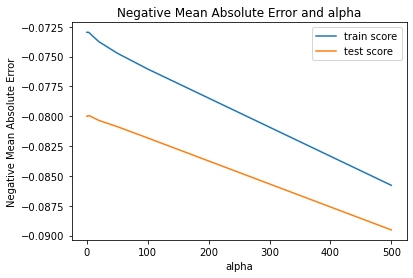

In [81]:
# plotting mean test and train scoes with alpha = 4

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [82]:
# best estimator fo rlambda
ridge_model_cv.best_params_

{'alpha': 4.0}

In [83]:
# chekcing the coefficients with lambda = 4

alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02143358, -0.02740168,  0.07004778,  0.04504657,  0.01961586,
        0.02519974, -0.01502614,  0.05737694,  0.01384451,  0.10834126,
        0.01113054,  0.01378383,  0.01108895,  0.01724915,  0.01107527,
        0.02933298,  0.01147492, -0.05471079, -0.0181825 , -0.00996866,
        0.06524672,  0.03398458,  0.13723695,  0.11017744, -0.00416724,
        0.01986543, -0.01346849, -0.00962512, -0.00858778, -0.00969861,
       -0.00877483, -0.01030945,  0.01473749, -0.01151185, -0.00974555,
        0.01868724,  0.01442639, -0.02622971, -0.01010322, -0.02444281,
       -0.00830087, -0.02117382,  0.01084064, -0.01402962,  0.00740293,
        0.0132893 ,  0.01880032,  0.03239622,  0.01314258, -0.01285453])

In [84]:
print(ridge.coef_)

[ 0.02143358 -0.02740168  0.07004778  0.04504657  0.01961586  0.02519974
 -0.01502614  0.05737694  0.01384451  0.10834126  0.01113054  0.01378383
  0.01108895  0.01724915  0.01107527  0.02933298  0.01147492 -0.05471079
 -0.0181825  -0.00996866  0.06524672  0.03398458  0.13723695  0.11017744
 -0.00416724  0.01986543 -0.01346849 -0.00962512 -0.00858778 -0.00969861
 -0.00877483 -0.01030945  0.01473749 -0.01151185 -0.00974555  0.01868724
  0.01442639 -0.02622971 -0.01010322 -0.02444281 -0.00830087 -0.02117382
  0.01084064 -0.01402962  0.00740293  0.0132893   0.01880032  0.03239622
  0.01314258 -0.01285453]


In [85]:
# putting the features and coefficient in a dataframe

house_price_ridge = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
house_price_ridge.reset_index(drop=True, inplace=True)
house_price_ridge

Features  Coefficient
0                LotArea       0.0214
1               BldgType      -0.0274
2            OverallQual       0.0700
3            OverallCond       0.0450
4           BsmtExposure       0.0196
5             BsmtFinSF1       0.0252
6              BsmtUnfSF      -0.0150
7            TotalBsmtSF       0.0574
8              HeatingQC       0.0138
9              GrLivArea       0.1083
10              FullBath       0.0111
11              HalfBath       0.0138
12           KitchenQual       0.0111
13           FireplaceQu       0.0172
14          GarageFinish       0.0111
15            GarageCars       0.0293
16         SaleCondition       0.0115
17      YearBuilt_DayOld      -0.0547
18   YearRemodAdd_DayOld      -0.0182
19    GarageYrBlt_DayOld      -0.0100
20           MSZoning_FV       0.0652
21           MSZoning_RH       0.0340
22           MSZoning_RL       0.1372
23           MSZoning_RM       0.1102
24  Neighborhood_CollgCr      -0.0042
25  Neighborhood_Crawfor       0.0199
26  Neighborhood_Edwards      -0.0135
27  Neighborhood_Gilbert      -0.0096
28  Neighborhood_MeadowV      -0.0086
29  Neighborhood_Mitchel      -0.0097
30    Neighborhood_NAmes      -0.0088
31   Neighborhood_NWAmes      -0.0103
32  Neighborhood_NridgHt       0.0147
33  Neighborhood_OldTown      -0.0115
34   Neighborhood_Sawyer      -0.0097
35  Neighborhood_Somerst       0.0187
36  Neighborhood_StoneBr       0.0144
37       RoofStyle_Gable      -0.0262
38     RoofStyle_Gambrel      -0.0101
39         RoofStyle_Hip      -0.0244
40        RoofStyle_Shed      -0.0083
41   Exterior1st_BrkComm      -0.0212
42   Exterior1st_BrkFace       0.0108
43   Exterior1st_Wd Sdng      -0.0140
44   Exterior2nd_MetalSd       0.0074
45   Exterior2nd_Wd Sdng       0.0133
46     Foundation_CBlock       0.0188
47      Foundation_PConc       0.0324
48       Foundation_Slab       0.0131
49       GarageType_None      -0.0129

In [86]:
# Assigning the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(5), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.02143,
 'BldgType': -0.0274,
 'OverallQual': 0.07005,
 'OverallCond': 0.04505,
 'BsmtExposure': 0.01962,
 'BsmtFinSF1': 0.0252,
 'BsmtUnfSF': -0.01503,
 'TotalBsmtSF': 0.05738,
 'HeatingQC': 0.01384,
 'GrLivArea': 0.10834,
 'FullBath': 0.01113,
 'HalfBath': 0.01378,
 'KitchenQual': 0.01109,
 'FireplaceQu': 0.01725,
 'GarageFinish': 0.01108,
 'GarageCars': 0.02933,
 'SaleCondition': 0.01147,
 'YearBuilt_DayOld': -0.05471,
 'YearRemodAdd_DayOld': -0.01818,
 'GarageYrBlt_DayOld': -0.00997,
 'MSZoning_FV': 0.06525,
 'MSZoning_RH': 0.03398,
 'MSZoning_RL': 0.13724,
 'MSZoning_RM': 0.11018,
 'Neighborhood_CollgCr': -0.00417,
 'Neighborhood_Crawfor': 0.01987,
 'Neighborhood_Edwards': -0.01347,
 'Neighborhood_Gilbert': -0.00963,
 'Neighborhood_MeadowV': -0.00859,
 'Neighborhood_Mitchel': -0.0097,
 'Neighborhood_NAmes': -0.00877,
 'Neighborhood_NWAmes': -0.01031,
 'Neighborhood_NridgHt': 0.01474,
 'Neighborhood_OldTown': -0.01151,
 'Neighborhood_Sawyer': -0.00975,
 'Neighborhood_S

In [87]:
# Doing a RFE to minimise the features to 15
X_train_ridge = X_train[house_price_ridge.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [88]:
# Creatinf function to gety coefficient value

def ridge_find_coefficient(x):
    return ridge_coeff_dict[x]

# Assign top 15 features to a temp dataframe for further display in the bar plot

house_price_ridge = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
house_price_ridge = house_price_ridge.loc[house_price_ridge['rfe_support'] == True]
house_price_ridge.reset_index(drop=True, inplace=True)

house_price_ridge['Coefficient'] = house_price_ridge['Features'].apply(ridge_find_coefficient)
house_price_ridge = house_price_ridge.sort_values(by=['Coefficient'], ascending=False)
house_price_ridge = house_price_ridge.head(15)
house_price_ridge

Features  rfe_support  rfe_ranking  Coefficient
10           MSZoning_RL         True            1      0.13724
11           MSZoning_RM         True            1      0.11018
5              GrLivArea         True            1      0.10834
1            OverallQual         True            1      0.07005
8            MSZoning_FV         True            1      0.06525
4            TotalBsmtSF         True            1      0.05738
2            OverallCond         True            1      0.04505
9            MSZoning_RH         True            1      0.03398
14      Foundation_PConc         True            1      0.03240
6             GarageCars         True            1      0.02933
12  Neighborhood_Crawfor         True            1      0.01987
3              BsmtUnfSF         True            1     -0.01503
13   Exterior1st_BrkComm         True            1     -0.02117
0               BldgType         True            1     -0.02740
7       YearBuilt_DayOld         True            1     -0.05471

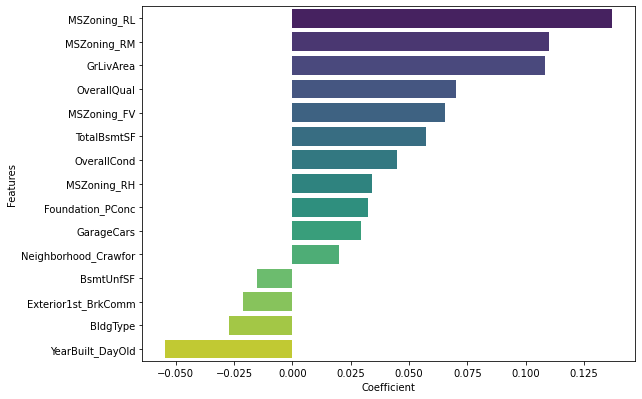

In [89]:
# Plotting the blot plot to determine the variables that would affect pricing of the house based on ridge Regression

plt.figure(figsize = (30,30))

plt.subplot(4,3,1)

sns.barplot(x='Coefficient' , y = 'Features' , palette='viridis',data = house_price_ridge)

plt.show()

In [90]:
# Predicting the X train and X test in ridge

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

house_price_ridge_metric = []

# calculating r2 square in Train and Test for Ridge Regression
print("R2 Square - Ridge Regression")
r2_train_ridge = r2_score(y_train, y_pred_train)
print("Train : ",r2_train_ridge)
house_price_ridge_metric.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print("Test : ",r2_test_ridge)
house_price_ridge_metric.append(r2_test_ridge)

print('_____________________________________')

#Calculating Residual Sum Of Square (RSS) of Train and Test for Ridge Regression

print("Residual Sum Of Square (RSS) - Ridge Regression")
rss_train_ridge = np.sum(np.square(y_train - y_pred_train))
print("Train : ",rss_train_ridge)
house_price_ridge_metric.append(rss_train_ridge)

rss_test_ridge = np.sum(np.square(y_test - y_pred_test))
print("Test : ",rss_test_ridge)
house_price_ridge_metric.append(rss_test_ridge)

print('_____________________________________')

# Calculating Mean Squared Error(MSE) of Train and Test for Ridge Regression

print("Mean Squared Error (MSE) - Ridge Regression")
mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print("Train : ",mse_train_ridge)
house_price_ridge_metric.append(mse_train_ridge)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print("Test : ",mse_test_ridge)
house_price_ridge_metric.append(mse_test_ridge)

R2 Square - Ridge Regression
Train :  0.9191777622637705
Test :  0.8999179414736553
_____________________________________
Residual Sum Of Square (RSS) - Ridge Regression
Train :  9.886204921911514
Test :  5.45573389754235
_____________________________________
Mean Squared Error (MSE) - Ridge Regression
Train :  0.010734207298492414
Test :  0.013777105801874622


Text(0, 0.5, 'Sales Price')

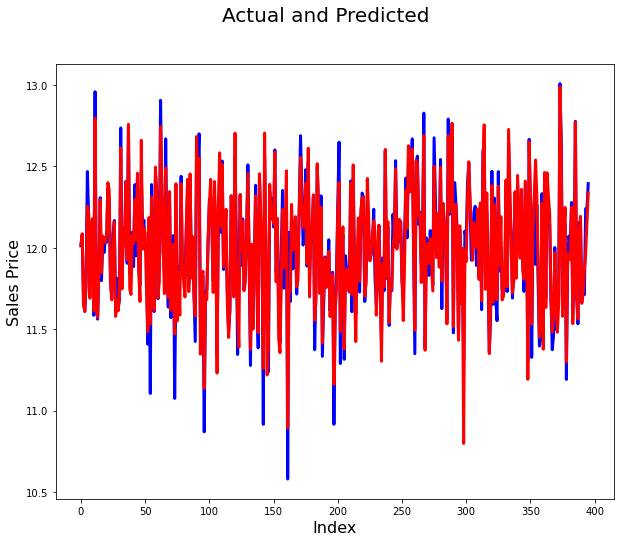

In [91]:
#Ridge visualization for train and test

colz = [i for i in range(0,y_test.shape[0],1)]

fig = plt.figure(figsize=(10,8))

plt.plot(colz,y_test,color='blue',linewidth=3.0,linestyle='-')

plt.plot(colz,y_pred_test,color='red',linewidth=3.0,linestyle='-')

fig.suptitle('Actual and Predicted', fontsize=20)

plt.xlabel('Index', fontsize=16)
plt.ylabel('Sales Price', fontsize=16) 

### B. Lasso Regression

In [92]:
#Setting Alphas for Lasso
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}


# loading Lasso

lasso = Lasso()

# cross validation with fold 5

folds = 5

lasso_model_cv = GridSearchCV(estimator = lasso, 
                              param_grid = params,
                              cv = folds,
                              scoring = 'neg_mean_absolute_error',
                              return_train_score = True,
                              verbose = 1)

# fitting the lasso model with X_train and y_train
lasso_model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
# Displaying the mean scores of Lasso

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001         -0.072957        -0.080007                1
1       0.0002         -0.072973        -0.080033                2
2       0.0003         -0.073015        -0.080048                3
3       0.0004         -0.073068        -0.080061                4
4       0.0005         -0.073151        -0.080094                5
5        0.001         -0.073779        -0.080671                6
6        0.002         -0.075217        -0.081513                7
7        0.003         -0.076373        -0.081879                8
8        0.004         -0.077022        -0.082091                9
9        0.005         -0.077700        -0.082529               10
10        0.01         -0.081670        -0.086225               11

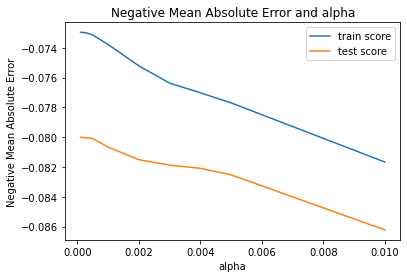

In [94]:
# plotting mean train and test scores with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting the train and test data

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [95]:
# checking the lambda
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [96]:
#checking the coefficients with lambda = 0.0001
alpha = 0.0001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train,y_train)

lasso.coef_

array([ 0.0213493 , -0.0275024 ,  0.06961445,  0.04455093,  0.01979454,
        0.02481649, -0.01525482,  0.05727258,  0.01369411,  0.11020815,
        0.00959007,  0.01281303,  0.01062451,  0.01679821,  0.01126368,
        0.0299469 ,  0.01093961, -0.0546029 , -0.01821177, -0.01001011,
        0.07667164,  0.03926678,  0.1584014 ,  0.12875316, -0.00409668,
        0.01949736, -0.0139611 , -0.0094146 , -0.00862296, -0.00989705,
       -0.00949028, -0.01041348,  0.01479604, -0.01213311, -0.01011172,
        0.01806057,  0.01431833, -0.02605789, -0.00937569, -0.02395144,
       -0.00817407, -0.02129365,  0.01111982, -0.01403951,  0.00775654,
        0.01317525,  0.0190353 ,  0.03241303,  0.01276223, -0.01249457])

In [97]:
# Displaying the Shortlisted Features and Coefficients in a house pricing dataframe

house_price_lasso = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
house_price_lasso = house_price_lasso[house_price_lasso['Coefficient'] != 0.00]
house_price_lasso.reset_index(drop=True, inplace=True)
house_price_lasso

Features  Coefficient
0                LotArea       0.0213
1               BldgType      -0.0275
2            OverallQual       0.0696
3            OverallCond       0.0446
4           BsmtExposure       0.0198
5             BsmtFinSF1       0.0248
6              BsmtUnfSF      -0.0153
7            TotalBsmtSF       0.0573
8              HeatingQC       0.0137
9              GrLivArea       0.1102
10              FullBath       0.0096
11              HalfBath       0.0128
12           KitchenQual       0.0106
13           FireplaceQu       0.0168
14          GarageFinish       0.0113
15            GarageCars       0.0299
16         SaleCondition       0.0109
17      YearBuilt_DayOld      -0.0546
18   YearRemodAdd_DayOld      -0.0182
19    GarageYrBlt_DayOld      -0.0100
20           MSZoning_FV       0.0767
21           MSZoning_RH       0.0393
22           MSZoning_RL       0.1584
23           MSZoning_RM       0.1288
24  Neighborhood_CollgCr      -0.0041
25  Neighborhood_Crawfor       0.0195
26  Neighborhood_Edwards      -0.0140
27  Neighborhood_Gilbert      -0.0094
28  Neighborhood_MeadowV      -0.0086
29  Neighborhood_Mitchel      -0.0099
30    Neighborhood_NAmes      -0.0095
31   Neighborhood_NWAmes      -0.0104
32  Neighborhood_NridgHt       0.0148
33  Neighborhood_OldTown      -0.0121
34   Neighborhood_Sawyer      -0.0101
35  Neighborhood_Somerst       0.0181
36  Neighborhood_StoneBr       0.0143
37       RoofStyle_Gable      -0.0261
38     RoofStyle_Gambrel      -0.0094
39         RoofStyle_Hip      -0.0240
40        RoofStyle_Shed      -0.0082
41   Exterior1st_BrkComm      -0.0213
42   Exterior1st_BrkFace       0.0111
43   Exterior1st_Wd Sdng      -0.0140
44   Exterior2nd_MetalSd       0.0078
45   Exterior2nd_Wd Sdng       0.0132
46     Foundation_CBlock       0.0190
47      Foundation_PConc       0.0324
48       Foundation_Slab       0.0128
49       GarageType_None      -0.0125

In [98]:
# Adding the lasso features and coefficients in dictionary for graphing purpose

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.021349296419370167,
 'BldgType': -0.027502400574801678,
 'OverallQual': 0.06961445457018803,
 'OverallCond': 0.04455092653837353,
 'BsmtExposure': 0.019794542894540603,
 'BsmtFinSF1': 0.02481648893672111,
 'BsmtUnfSF': -0.015254816111713835,
 'TotalBsmtSF': 0.05727257906477314,
 'HeatingQC': 0.01369411403581432,
 'GrLivArea': 0.11020815258917264,
 'FullBath': 0.009590073404811958,
 'HalfBath': 0.01281303347724613,
 'KitchenQual': 0.010624508834594933,
 'FireplaceQu': 0.01679820654754361,
 'GarageFinish': 0.011263683163216142,
 'GarageCars': 0.029946899494431453,
 'SaleCondition': 0.010939606475307182,
 'YearBuilt_DayOld': -0.054602895655096934,
 'YearRemodAdd_DayOld': -0.01821177239802002,
 'GarageYrBlt_DayOld': -0.010010110095605486,
 'MSZoning_FV': 0.07667163963649395,
 'MSZoning_RH': 0.03926677984669098,
 'MSZoning_RL': 0.15840139753969554,
 'MSZoning_RM': 0.12875316201761305,
 'Neighborhood_CollgCr': -0.004096676013328965,
 'Neighborhood_Crawfor': 0.019497361897753848

In [99]:
# Doing the RFE to minimise the features to 15 for Lasso
X_train_lasso = X_train[house_price_lasso.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE for Lasso
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [100]:
def lasso_find_coefficient(x):
    return lasso_coeff_dict[x]

# Assign top 15 features to a temp dataframe for further display in the bar plot

house_price_lasso = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
house_price_lasso = house_price_lasso.loc[house_price_lasso['rfe_support'] == True]
house_price_lasso.reset_index(drop=True, inplace=True)

house_price_lasso['Coefficient'] = house_price_lasso['Features'].apply(lasso_find_coefficient)
house_price_lasso = house_price_lasso.sort_values(by=['Coefficient'], ascending=False)
house_price_lasso = house_price_lasso.head(15)
house_price_lasso

Features  rfe_support  rfe_ranking  Coefficient
10           MSZoning_RL         True            1     0.158401
11           MSZoning_RM         True            1     0.128753
5              GrLivArea         True            1     0.110208
8            MSZoning_FV         True            1     0.076672
1            OverallQual         True            1     0.069614
4            TotalBsmtSF         True            1     0.057273
2            OverallCond         True            1     0.044551
9            MSZoning_RH         True            1     0.039267
14      Foundation_PConc         True            1     0.032413
6             GarageCars         True            1     0.029947
12  Neighborhood_Crawfor         True            1     0.019497
3              BsmtUnfSF         True            1    -0.015255
13   Exterior1st_BrkComm         True            1    -0.021294
0               BldgType         True            1    -0.027502
7       YearBuilt_DayOld         True            1    -0.054603

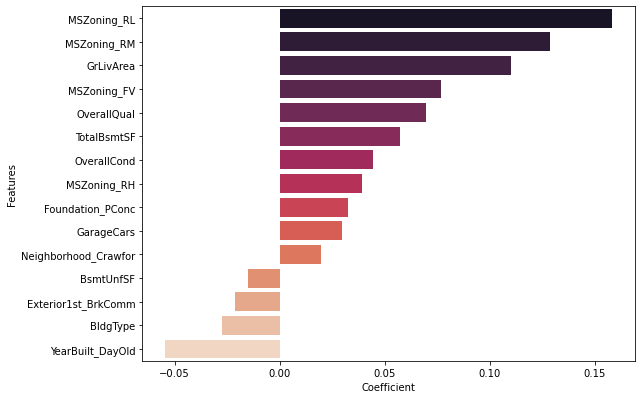

In [101]:
# Plotting the blot plot to determine the variables that would affect pricing of the house based on Lasso Regression

plt.figure(figsize = (30,30))

plt.subplot(4,3,1)

sns.barplot(x='Coefficient' , y = 'Features' , palette='rocket',data = house_price_lasso)

plt.show()

In [102]:
# Predicting the X train and X test in lasso

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

house_price_lasso_metric = []

# calculating r2 square in Train and Test for Lasso Regression
print("R2 Square - Lasso Regression")
r2_train_lasso = r2_score(y_train, y_pred_train)
print("Train : ",r2_train_lasso)
house_price_lasso_metric.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print("Test : ",r2_test_lasso)
house_price_lasso_metric.append(r2_test_lasso)

print('_____________________________________')

#Calculating Residual Sum Of Square (RSS) of Train and Test for Lasso Regression

print("Residual Sum Of Square (RSS) - Lasso Regression")
rss_train_lasso = np.sum(np.square(y_train - y_pred_train))
print("Train : ",rss_train_lasso)
house_price_lasso_metric.append(rss_train_lasso)

rss_test_lasso = np.sum(np.square(y_test - y_pred_test))
print("Test : ",rss_test_lasso)
house_price_lasso_metric.append(rss_test_lasso)

print('_____________________________________')

# Calculating Mean Squared Error(MSE) of Train and Test for Lasso Regression

print("Mean Squared Error (MSE) - Lasso Regression")
mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print("Train : ",mse_train_lasso)
house_price_lasso_metric.append(mse_train_lasso)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print("Test : ",mse_test_lasso)
house_price_lasso_metric.append(mse_test_lasso)

R2 Square - Lasso Regression
Train :  0.9194143090822517
Test :  0.8995805481830311
_____________________________________
Residual Sum Of Square (RSS) - Lasso Regression
Train :  9.857270430778462
Test :  5.474126085308728
_____________________________________
Mean Squared Error (MSE) - Lasso Regression
Train :  0.010702790912897352
Test :  0.013823550720476587


Text(0, 0.5, 'Sales Price')

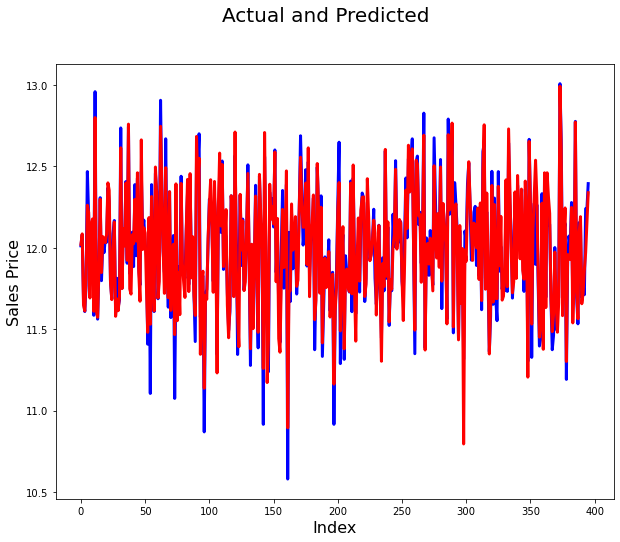

In [103]:
#Lasso visualization for train and test

colz = [i for i in range(0,y_test.shape[0],1)]

fig = plt.figure(figsize=(10,8))

plt.plot(colz,y_test,color='blue',linewidth=3.0,linestyle='-')

plt.plot(colz,y_pred_test,color='red',linewidth=3.0,linestyle='-')

fig.suptitle('Actual and Predicted', fontsize=20)

plt.xlabel('Index', fontsize=16)
plt.ylabel('Sales Price', fontsize=16) 

In [104]:
# Comparing the R2,RSS,MSE of Linear,Ridge and Lasso Regression

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                      'MSE (Train)','MSE (Test)'], 
            'Linear Regression' : house_price_lr_metric
        }
print(len(house_price_lr_metric))

print(len(house_price_ridge_metric))

print(len(house_price_lasso_metric))
      
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(house_price_ridge_metric, name = 'Ridge Regression')
ls_metric = pd.Series(house_price_lasso_metric, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric,rg_metric, ls_metric], axis = 1)

final_metric


6
6
6


Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.922614          0.919178          0.919414
1   R2 Score (Test)           0.900235          0.899918          0.899581
2       RSS (Train)           9.465860          9.886205          9.857270
3        RSS (Test)           5.438454          5.455734          5.474126
4       MSE (Train)           0.101380          0.010734          0.010703
5        MSE (Test)           0.117190          0.013777          0.013824

In [105]:
X_train.columns

Index(['LotArea', 'BldgType', 'OverallQual', 'OverallCond', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea',
       'FullBath', 'HalfBath', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
       'GarageCars', 'SaleCondition', 'YearBuilt_DayOld',
       'YearRemodAdd_DayOld', 'GarageYrBlt_DayOld', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior2nd_Wd Sdng',
       'Foundation_CBlock', 'Foundation_PConc', 

**Checking the coefficient for all columns in Linear,Ridge and Lasso**

In [106]:
house_price_coeff_check = pd.DataFrame(index=X_train.columns)
house_price_coeff_check .shape

(50, 0)

In [107]:
# declaring columns

house_price_coeff_check['Linear'] = lm.coef_
house_price_coeff_check['Ridge'] = ridge.coef_
house_price_coeff_check['Lasso'] = lasso.coef_

In [108]:
# Displaying the coefficients
pd.set_option('display.max_rows', None)
house_price_coeff_check.head(50)

Linear     Ridge     Lasso
LotArea               0.021451  0.021434  0.021349
BldgType             -0.027959 -0.027402 -0.027502
OverallQual           0.069207  0.070048  0.069614
OverallCond           0.044403  0.045047  0.044551
BsmtExposure          0.019882  0.019616  0.019795
BsmtFinSF1            0.024346  0.025200  0.024816
BsmtUnfSF            -0.015775 -0.015026 -0.015255
TotalBsmtSF           0.057833  0.057377  0.057273
HeatingQC             0.013702  0.013845  0.013694
GrLivArea             0.110024  0.108341  0.110208
FullBath              0.009688  0.011131  0.009590
HalfBath              0.012897  0.013784  0.012813
KitchenQual           0.010525  0.011089  0.010625
FireplaceQu           0.016730  0.017249  0.016798
GarageFinish          0.011358  0.011075  0.011264
GarageCars            0.029936  0.029333  0.029947
SaleCondition         0.010880  0.011475  0.010940
YearBuilt_DayOld     -0.054032 -0.054711 -0.054603
YearRemodAdd_DayOld  -0.018384 -0.018183 -0.018212
GarageYrBlt_DayOld   -0.010263 -0.009969 -0.010010
MSZoning_FV           0.080004  0.065247  0.076672
MSZoning_RH           0.041089  0.033985  0.039267
MSZoning_RL           0.164836  0.137237  0.158401
MSZoning_RM           0.134645  0.110177  0.128753
Neighborhood_CollgCr -0.004578 -0.004167 -0.004097
Neighborhood_Crawfor  0.019405  0.019865  0.019497
Neighborhood_Edwards -0.014499 -0.013468 -0.013961
Neighborhood_Gilbert -0.009797 -0.009625 -0.009415
Neighborhood_MeadowV -0.008797 -0.008588 -0.008623
Neighborhood_Mitchel -0.010328 -0.009699 -0.009897
Neighborhood_NAmes   -0.010419 -0.008775 -0.009490
Neighborhood_NWAmes  -0.010980 -0.010309 -0.010413
Neighborhood_NridgHt  0.014860  0.014737  0.014796
Neighborhood_OldTown -0.012709 -0.011512 -0.012133
Neighborhood_Sawyer  -0.010683 -0.009746 -0.010112
Neighborhood_Somerst  0.017898  0.018687  0.018061
Neighborhood_StoneBr  0.014424  0.014426  0.014318
RoofStyle_Gable      -0.030432 -0.026230 -0.026058
RoofStyle_Gambrel    -0.010300 -0.010103 -0.009376
RoofStyle_Hip        -0.028077 -0.024443 -0.023951
RoofStyle_Shed       -0.008710 -0.008301 -0.008174
Exterior1st_BrkComm  -0.021442 -0.021174 -0.021294
Exterior1st_BrkFace   0.011231  0.010841  0.011120
Exterior1st_Wd Sdng  -0.014779 -0.014030 -0.014040
Exterior2nd_MetalSd   0.008083  0.007403  0.007757
Exterior2nd_Wd Sdng   0.013927  0.013289  0.013175
Foundation_CBlock     0.020287  0.018800  0.019035
Foundation_PConc      0.033497  0.032396  0.032413
Foundation_Slab       0.013155  0.013143  0.012762
GarageType_None      -0.012731 -0.012855 -0.012495

In [109]:
print(mean_squared_error(y_test, ridge.predict(X_test)))

print(mean_squared_error(y_test, lasso.predict(X_test)))

0.013777105801874622
0.013823550720476587


## Conclusion

Since the model accuracy on test and train set for all three models above are similar, we would chose the simpler model.<br/>
Simple Linear Regression model is fairly complex, hence we would not consider that.<br/>
Ridge Regression model is fairly complex, hence we would not consider that.<br/>

The optimal lambda value in case of Ridge and Lasso is as below:

Ridge - 4 <br/>
Lasso - 0.0001 <br/>

The Mean Squared error in case of Ridge and Lasso are:

Ridge - 0.013777 <br/>
Lasso - 0.013823 <br/>

Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

From our initial set of columns, few of the major influencers for Sales Pricing are:

<ol>
  <li>MSZoning_RL</li>
  <li>MSZoning_RM</li>
  <li>GrLivArea</li>
  <li>MSZoning_FV</li>
  <li>OverallQual</li>
  <li>TotalBsmtSF</li>
  <li>OverallCond</li>
  <li>MSZoning_RH</li>
  <li>Foundation_PConc</li>
  <li>GarageCars</li>
</ol>





## Problem Statement - 2

**1. Doubling the lambda value for ridge and lasso**<br/><br/>

The original optimal lambda value in case of Ridge and Lasso is as below:

Ridge - 4<br/>
Lasso - 0.0001<br/>

**AFTER DOUBLING**<br/><br/>
Ridge - 8<br/>
Lasso - 0.0002<br/>


**A. RIDGE REGRESSION**

In [110]:
# DOubling the alpha in ridge from 4 to 8

alpha = 8
ridge_2 = Ridge(alpha=alpha)

ridge_2.fit(X_train, y_train)
ridge_2.coef_

array([ 0.02148701, -0.02693519,  0.07056458,  0.04534505,  0.01944328,
        0.02604169, -0.01422132,  0.05681048,  0.01399127,  0.10678457,
        0.01233477,  0.01452903,  0.01159342,  0.01768269,  0.01093727,
        0.0289536 ,  0.01188144, -0.05474835, -0.01810989, -0.00984536,
        0.05505181,  0.02904615,  0.11803365,  0.09309311, -0.00385877,
        0.0201491 , -0.01278396, -0.00951975, -0.00843218, -0.00924042,
       -0.00759622, -0.00981274,  0.01462547, -0.01070638, -0.00909069,
        0.01913576,  0.01440526, -0.02295561, -0.00986456, -0.02152791,
       -0.0079656 , -0.02094834,  0.01056287, -0.0134706 ,  0.00690194,
        0.01276243,  0.01766415,  0.03151084,  0.01307797, -0.01295293])

In [111]:
# Predicting the X train and X test in ridge

y_pred_train = ridge_2.predict(X_train)
y_pred_test = ridge_2.predict(X_test)

house_price_ridge_metric_2 = []

# calculating r2 square in Train and Test for Ridge Regression
print("R2 Square - Ridge Regression")
r2_train_ridge = r2_score(y_train, y_pred_train)
print("Train : ",r2_train_ridge)
house_price_ridge_metric_2.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print("Test : ",r2_test_ridge)
house_price_ridge_metric_2.append(r2_test_ridge)

print('_____________________________________')

#Calculating Residual Sum Of Square (RSS) of Train and Test for Ridge Regression

print("Residual Sum Of Square (RSS) - Ridge Regression")
rss_train_ridge = np.sum(np.square(y_train - y_pred_train))
print("Train : ",rss_train_ridge)
house_price_ridge_metric_2.append(rss_train_ridge)

rss_test_ridge = np.sum(np.square(y_test - y_pred_test))
print("Test : ",rss_test_ridge)
house_price_ridge_metric_2.append(rss_test_ridge)

print('_____________________________________')

# Calculating Mean Squared Error(MSE) of Train and Test for Ridge Regression

print("Mean Squared Error (MSE) - Ridge Regression")
mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print("Train : ",mse_train_ridge)
house_price_ridge_metric_2.append(mse_train_ridge)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print("Test : ",mse_test_ridge)
house_price_ridge_metric_2.append(mse_test_ridge)

R2 Square - Ridge Regression
Train :  0.9186672357514983
Test :  0.9004952062096669
_____________________________________
Residual Sum Of Square (RSS) - Ridge Regression
Train :  9.948652706825143
Test :  5.424265692006941
_____________________________________
Mean Squared Error (MSE) - Ridge Regression
Train :  0.01080201162521731
Test :  0.013697640636381164


**B. LASSO REGRESSION**

In [112]:
# Doubling the alpha in lasso from 0.0001 to 0.0002

alpha = 0.0002
lasso_2 = Lasso(alpha=alpha)

lasso_2.fit(X_train, y_train)
lasso_2.coef_

array([ 0.02124867, -0.02704607,  0.07002038,  0.04469627,  0.01970817,
        0.02528967, -0.01473203,  0.05670925,  0.01368683,  0.11039201,
        0.00949055,  0.01272856,  0.01072386,  0.01686539,  0.01117082,
        0.02996007,  0.01099769, -0.05516717, -0.0180406 , -0.00975766,
        0.07336988,  0.0374587 ,  0.15201894,  0.12290508, -0.00361587,
        0.01958778, -0.01342595, -0.00903281, -0.00844864, -0.00946762,
       -0.0085643 , -0.00984851,  0.01473168, -0.0115589 , -0.00954269,
        0.01821894,  0.0142123 , -0.02167699, -0.00844809, -0.01981822,
       -0.00763755, -0.0211455 ,  0.0110093 , -0.0133018 ,  0.0074307 ,
        0.01242422,  0.01778579,  0.03133019,  0.01236962, -0.01225771])

In [113]:
# Predicting the X train and X test in lasso

y_pred_train = lasso_2.predict(X_train)
y_pred_test = lasso_2.predict(X_test)

house_price_lasso_metric_2 = []

# calculating r2 square in Train and Test for Lasso Regression
print("R2 Square - Lasso Regression")
r2_train_lasso = r2_score(y_train, y_pred_train)
print("Train : ",r2_train_lasso)
house_price_lasso_metric_2.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print("Test : ",r2_test_lasso)
house_price_lasso_metric_2.append(r2_test_lasso)

print('_____________________________________')

#Calculating Residual Sum Of Square (RSS) of Train and Test for Lasso Regression

print("Residual Sum Of Square (RSS) - Lasso Regression")
rss_train_lasso = np.sum(np.square(y_train - y_pred_train))
print("Train : ",rss_train_lasso)
house_price_lasso_metric_2.append(rss_train_lasso)

rss_test_lasso = np.sum(np.square(y_test - y_pred_test))
print("Test : ",rss_test_lasso)
house_price_lasso_metric_2.append(rss_test_lasso)

print('_____________________________________')

# Calculating Mean Squared Error(MSE) of Train and Test for Lasso Regression

print("Mean Squared Error (MSE) - Lasso Regression")
mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print("Train : ",mse_train_lasso)
house_price_lasso_metric_2.append(mse_train_lasso)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print("Test : ",mse_test_lasso)
house_price_lasso_metric_2.append(mse_test_lasso)

R2 Square - Lasso Regression
Train :  0.9193292237532968
Test :  0.9001762774128144
_____________________________________
Residual Sum Of Square (RSS) - Lasso Regression
Train :  9.86767809853744
Test :  5.4416513320858035
_____________________________________
Mean Squared Error (MSE) - Lasso Regression
Train :  0.010714091312201345
Test :  0.013741543767893443


In [114]:
# Checking the coefficients of all features in Ridge, NEW Ridge, Lasso , NEW Lasso

house_price_coeff_check_1 = pd.DataFrame(index=X_train.columns)
house_price_coeff_check_1['Ridge'] = ridge.coef_
house_price_coeff_check_1['Ridge_2'] = ridge_2.coef_
house_price_coeff_check_1['Lasso'] = lasso.coef_
house_price_coeff_check_1['Lasso_2'] = lasso_2.coef_
pd.set_option('display.max_rows', None)
house_price_coeff_check_1.head(68)

Ridge   Ridge_2     Lasso   Lasso_2
LotArea               0.021434  0.021487  0.021349  0.021249
BldgType             -0.027402 -0.026935 -0.027502 -0.027046
OverallQual           0.070048  0.070565  0.069614  0.070020
OverallCond           0.045047  0.045345  0.044551  0.044696
BsmtExposure          0.019616  0.019443  0.019795  0.019708
BsmtFinSF1            0.025200  0.026042  0.024816  0.025290
BsmtUnfSF            -0.015026 -0.014221 -0.015255 -0.014732
TotalBsmtSF           0.057377  0.056810  0.057273  0.056709
HeatingQC             0.013845  0.013991  0.013694  0.013687
GrLivArea             0.108341  0.106785  0.110208  0.110392
FullBath              0.011131  0.012335  0.009590  0.009491
HalfBath              0.013784  0.014529  0.012813  0.012729
KitchenQual           0.011089  0.011593  0.010625  0.010724
FireplaceQu           0.017249  0.017683  0.016798  0.016865
GarageFinish          0.011075  0.010937  0.011264  0.011171
GarageCars            0.029333  0.028954  0.029947  0.029960
SaleCondition         0.011475  0.011881  0.010940  0.010998
YearBuilt_DayOld     -0.054711 -0.054748 -0.054603 -0.055167
YearRemodAdd_DayOld  -0.018183 -0.018110 -0.018212 -0.018041
GarageYrBlt_DayOld   -0.009969 -0.009845 -0.010010 -0.009758
MSZoning_FV           0.065247  0.055052  0.076672  0.073370
MSZoning_RH           0.033985  0.029046  0.039267  0.037459
MSZoning_RL           0.137237  0.118034  0.158401  0.152019
MSZoning_RM           0.110177  0.093093  0.128753  0.122905
Neighborhood_CollgCr -0.004167 -0.003859 -0.004097 -0.003616
Neighborhood_Crawfor  0.019865  0.020149  0.019497  0.019588
Neighborhood_Edwards -0.013468 -0.012784 -0.013961 -0.013426
Neighborhood_Gilbert -0.009625 -0.009520 -0.009415 -0.009033
Neighborhood_MeadowV -0.008588 -0.008432 -0.008623 -0.008449
Neighborhood_Mitchel -0.009699 -0.009240 -0.009897 -0.009468
Neighborhood_NAmes   -0.008775 -0.007596 -0.009490 -0.008564
Neighborhood_NWAmes  -0.010309 -0.009813 -0.010413 -0.009849
Neighborhood_NridgHt  0.014737  0.014625  0.014796  0.014732
Neighborhood_OldTown -0.011512 -0.010706 -0.012133 -0.011559
Neighborhood_Sawyer  -0.009746 -0.009091 -0.010112 -0.009543
Neighborhood_Somerst  0.018687  0.019136  0.018061  0.018219
Neighborhood_StoneBr  0.014426  0.014405  0.014318  0.014212
RoofStyle_Gable      -0.026230 -0.022956 -0.026058 -0.021677
RoofStyle_Gambrel    -0.010103 -0.009865 -0.009376 -0.008448
RoofStyle_Hip        -0.024443 -0.021528 -0.023951 -0.019818
RoofStyle_Shed       -0.008301 -0.007966 -0.008174 -0.007638
Exterior1st_BrkComm  -0.021174 -0.020948 -0.021294 -0.021145
Exterior1st_BrkFace   0.010841  0.010563  0.011120  0.011009
Exterior1st_Wd Sdng  -0.014030 -0.013471 -0.014040 -0.013302
Exterior2nd_MetalSd   0.007403  0.006902  0.007757  0.007431
Exterior2nd_Wd Sdng   0.013289  0.012762  0.013175  0.012424
Foundation_CBlock     0.018800  0.017664  0.019035  0.017786
Foundation_PConc      0.032396  0.031511  0.032413  0.031330
Foundation_Slab       0.013143  0.013078  0.012762  0.012370
GarageType_None      -0.012855 -0.012953 -0.012495 -0.012258

In [115]:
# Comparing the R2,RSS,MSE of Linear,Ridge,New Ridge,Lasso and New Lasso

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                      'MSE (Train)','MSE (Test)'], 
            'Linear Regression' : house_price_lr_metric
        }
print(len(house_price_lr_metric))

print(len(house_price_ridge_metric))

print(len(house_price_lasso_metric))
      
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(house_price_ridge_metric, name = 'Ridge Regression')
rg_metric_2 = pd.Series(house_price_ridge_metric_2, name = 'Ridge Regression_Double')
ls_metric = pd.Series(house_price_lasso_metric, name = 'Lasso Regression')
ls_metric_2 = pd.Series(house_price_lasso_metric_2, name = 'Lasso Regression_Double')

final_metric = pd.concat([lr_metric,rg_metric,rg_metric_2, ls_metric,ls_metric_2], axis = 1)

final_metric

6
6
6


Metric  Linear Regression  Ridge Regression  \
0  R2 Score (Train)           0.922614          0.919178   
1   R2 Score (Test)           0.900235          0.899918   
2       RSS (Train)           9.465860          9.886205   
3        RSS (Test)           5.438454          5.455734   
4       MSE (Train)           0.101380          0.010734   
5        MSE (Test)           0.117190          0.013777   

   Ridge Regression_Double  Lasso Regression  Lasso Regression_Double  
0                 0.918667          0.919414                 0.919329  
1                 0.900495          0.899581                 0.900176  
2                 9.948653          9.857270                 9.867678  
3                 5.424266          5.474126                 5.441651  
4                 0.010802          0.010703                 0.010714  
5                 0.013698          0.013824                 0.013742

Here After Doubling the lambda the comparisons are below
<ol>
  <li>R2 square value of new ridge and new lasso are more than old ridge and old lasso</li>
  <li>RSS value of new ridge and new lasso are less than old ridge and old lasso</li>
  <li>MSE value of new ridge and new lasso are less than old ridge and old lasso </li>
</ol>

After Doubling the Alpha From our initial set of columns, few of the major influencers for Sales Pricing are:

<ol>
  <li>MSZoning_RL</li>
  <li>MSZoning_RM</li>
  <li>GrLivArea</li>
  <li>MSZoning_FV</li>
  <li>OverallQual</li>
  <li>TotalBsmtSF</li>
  <li>OverallCond</li>
  <li>MSZoning_RH</li>
  <li>Foundation_PConc</li>
  <li>GarageCars</li>
</ol>


**2. Aplication of regression based on optimal lambda value**

The optimal lambda value in case of Ridge and Lasso is as below:

Ridge - 4 <br/>
Lasso - 0.0001 <br/>
  
The r2_score of ridge is slightly higher than lasso for the test dataset so we will choose ridge regression to solve this problem

**3. Remove the 5 important predictors and check new lasso and new 5 predictors**

As per lasso this is the 5 important predictors variable

MSZoning_RL<br/><br/>
MSZoning_RM<br/><br/>
GrLivArea<br/><br/>
MSZoning_FV<br/><br/>
OverallQual<br/><br/>

We will remove this predictors

In [116]:
# removing top 5 predictors in X_train

X_train_new = X_train.drop(['MSZoning_RL','MSZoning_RM','GrLivArea','MSZoning_FV','OverallQual'],axis = 1)

# Removing top 5predictors in X_test

X_test_new = X_test.drop(['MSZoning_RL','MSZoning_RM','GrLivArea','MSZoning_FV','OverallQual'],axis = 1)

In [117]:
X_train_new.head()

LotArea  BldgType  OverallCond  BsmtExposure  BsmtFinSF1  BsmtUnfSF  \
1080  0.069642 -0.426346     2.173499      0.428921   -1.011415   0.343486   
274   1.790845  0.489637    -0.522732      0.428921    1.081248  -0.545596   
323  -0.677612 -0.426346    -1.421475      1.413047   -0.264924  -0.206898   
864  -0.252209 -0.426346    -0.522732      0.428921    0.727909   0.192954   
325  -0.506891 -0.426346     0.376012      1.413047    0.912043  -1.037178   

      TotalBsmtSF  HeatingQC  FullBath  HalfBath  ...  RoofStyle_Shed  \
1080    -0.824905  -0.137665 -0.994865 -0.740145  ...       -0.038999   
274      0.436073  -1.179648 -0.994865 -0.740145  ...       -0.038999   
323      0.155554   0.904317 -0.994865 -0.740145  ...       -0.038999   
864      0.904515   0.904317  0.858370 -0.740145  ...       -0.038999   
325     -0.318335   0.904317 -0.994865 -0.740145  ...       -0.038999   

      Exterior1st_BrkComm  Exterior1st_BrkFace  Exterior1st_Wd Sdng  \
1080            -0.038999            -0.183717            -0.394034   
274             -0.038999            -0.183717            -0.394034   
323             -0.038999            -0.183717             2.537849   
864             -0.038999            -0.183717            -0.394034   
325             -0.038999            -0.183717            -0.394034   

      Exterior2nd_MetalSd  Exterior2nd_Wd Sdng  Foundation_CBlock  \
1080            -0.425636            -0.388875          -0.887116   
274              2.349426            -0.388875           1.127249   
323             -0.425636            -0.388875           1.127249   
864             -0.425636            -0.388875          -0.887116   
325             -0.425636            -0.388875           1.127249   

      Foundation_PConc  Foundation_Slab  GarageType_None  
1080          1.144782        -0.136241        -0.252612  
274          -0.873529        -0.136241        -0.252612  
323          -0.873529        -0.136241        -0.252612  
864           1.144782        -0.136241        -0.252612  
325          -0.873529        -0.136241        -0.252612  

[5 rows x 45 columns]

In [118]:
# Checking Columns

X_train_new.columns

Index(['LotArea', 'BldgType', 'OverallCond', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'FullBath', 'HalfBath',
       'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageCars',
       'SaleCondition', 'YearBuilt_DayOld', 'YearRemodAdd_DayOld',
       'GarageYrBlt_DayOld', 'MSZoning_RH', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior2nd_Wd Sdng',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'GarageType_None'],
      dtype='object')

In [119]:
X_test_new.head()

LotArea  BldgType  OverallCond  BsmtExposure  BsmtFinSF1  BsmtUnfSF  \
261 -1.427385  2.321604    -0.522732     -0.555206   -1.011415   0.162377   
991 -0.009561 -0.426346    -0.522732     -0.555206   -0.951696   1.726502   
554 -0.394103 -0.426346    -0.522732      0.428921    1.235523  -1.011306   
49  -0.246052  1.405621    -0.522732      2.397173   -0.752631  -1.307666   
857 -0.602047 -0.426346     2.173499     -0.555206   -0.021070  -0.562060   

     TotalBsmtSF  HeatingQC  FullBath  HalfBath  ...  RoofStyle_Shed  \
261    -1.034614   0.904317  0.858370  1.253251  ...       -0.038999   
991     0.841874  -0.137665  0.858370 -0.740145  ...       -0.038999   
554     0.065678  -0.137665 -0.994865 -0.740145  ...       -0.038999   
49     -0.514426  -1.179648 -0.994865 -0.740145  ...       -0.038999   
857    -0.383698  -0.137665 -0.994865 -0.740145  ...       -0.038999   

     Exterior1st_BrkComm  Exterior1st_BrkFace  Exterior1st_Wd Sdng  \
261            -0.038999            -0.183717            -0.394034   
991            -0.038999            -0.183717            -0.394034   
554            -0.038999            -0.183717            -0.394034   
49             -0.038999            -0.183717             2.537849   
857            -0.038999            -0.183717            -0.394034   

     Exterior2nd_MetalSd  Exterior2nd_Wd Sdng  Foundation_CBlock  \
261             2.349426            -0.388875          -0.887116   
991            -0.425636            -0.388875          -0.887116   
554            -0.425636            -0.388875           1.127249   
49             -0.425636             2.571520           1.127249   
857            -0.425636            -0.388875           1.127249   

     Foundation_PConc  Foundation_Slab  GarageType_None  
261          1.144782        -0.136241        -0.252612  
991          1.144782        -0.136241        -0.252612  
554         -0.873529        -0.136241        -0.252612  
49          -0.873529        -0.136241        -0.252612  
857         -0.873529        -0.136241        -0.252612  

[5 rows x 45 columns]

In [120]:
# checking new columns
X_test_new.columns

Index(['LotArea', 'BldgType', 'OverallCond', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'FullBath', 'HalfBath',
       'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageCars',
       'SaleCondition', 'YearBuilt_DayOld', 'YearRemodAdd_DayOld',
       'GarageYrBlt_DayOld', 'MSZoning_RH', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior2nd_Wd Sdng',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'GarageType_None'],
      dtype='object')

In [121]:
#Checking new dataset with Lasso

alpha = 0.0001
lasso_new = Lasso(alpha=alpha)

lasso_new.fit(X_train_new, y_train)
lasso_new.coef_

array([ 0.03236243, -0.03301247,  0.05431502,  0.01913187,  0.02320746,
       -0.0143233 ,  0.09221894,  0.01765844,  0.08316767,  0.06949822,
        0.03220746,  0.04717011,  0.01236299,  0.04262684,  0.01667316,
       -0.0501001 , -0.01976271, -0.        ,  0.00741684, -0.00688863,
        0.02502167, -0.01631338, -0.02190492, -0.01299273, -0.01146472,
       -0.00736924, -0.01666931,  0.01802839, -0.00356887, -0.01481824,
        0.01539101,  0.02371199, -0.03390009, -0.01620657, -0.02514632,
       -0.01062475, -0.01706922,  0.00599234, -0.00312226,  0.00578328,
        0.00654051,  0.01163785,  0.03689264,  0.02237163, -0.00904558])

In [122]:
# Predicting the X train and X test in lasso

y_pred_train = lasso_new.predict(X_train_new)
y_pred_test = lasso_new.predict(X_test_new)

house_price_lasso_metric_new = []

# calculating r2 square in Train and Test for Lasso Regression
print("R2 Square - Lasso Regression")
r2_train_lasso = r2_score(y_train, y_pred_train)
print("Train : ",r2_train_lasso)
house_price_lasso_metric_new.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print("Test : ",r2_test_lasso)
house_price_lasso_metric_new.append(r2_test_lasso)

print('_____________________________________')

#Calculating Residual Sum Of Square (RSS) of Train and Test for Lasso Regression

print("Residual Sum Of Square (RSS) - Lasso Regression")
rss_train_lasso = np.sum(np.square(y_train - y_pred_train))
print("Train : ",rss_train_lasso)
house_price_lasso_metric_new.append(rss_train_lasso)

rss_test_lasso = np.sum(np.square(y_test - y_pred_test))
print("Test : ",rss_test_lasso)
house_price_lasso_metric_new.append(rss_test_lasso)

print('_____________________________________')

# Calculating Mean Squared Error(MSE) of Train and Test for Lasso Regression

print("Mean Squared Error (MSE) - Lasso Regression")
mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print("Train : ",mse_train_lasso)
house_price_lasso_metric_new.append(mse_train_lasso)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print("Test : ",mse_test_lasso)
house_price_lasso_metric_new.append(mse_test_lasso)

R2 Square - Lasso Regression
Train :  0.86990330668717
Test :  0.8370271573518255
_____________________________________
Residual Sum Of Square (RSS) - Lasso Regression
Train :  15.913473887610188
Test :  8.884074479547532
_____________________________________
Mean Squared Error (MSE) - Lasso Regression
Train :  0.017278473276449716
Test :  0.02243453151400892


In [123]:
house_price_coeff_check_2 = pd.DataFrame(index=X_train_new.columns)
house_price_coeff_check_2.rows = X_train_new.columns
house_price_coeff_check_2['Lasso New'] = lasso_new.coef_
pd.set_option('display.max_rows', None)
house_price_coeff_check_2.head(68)

Lasso New
LotArea                0.032362
BldgType              -0.033012
OverallCond            0.054315
BsmtExposure           0.019132
BsmtFinSF1             0.023207
BsmtUnfSF             -0.014323
TotalBsmtSF            0.092219
HeatingQC              0.017658
FullBath               0.083168
HalfBath               0.069498
KitchenQual            0.032207
FireplaceQu            0.047170
GarageFinish           0.012363
GarageCars             0.042627
SaleCondition          0.016673
YearBuilt_DayOld      -0.050100
YearRemodAdd_DayOld   -0.019763
GarageYrBlt_DayOld    -0.000000
MSZoning_RH            0.007417
Neighborhood_CollgCr  -0.006889
Neighborhood_Crawfor   0.025022
Neighborhood_Edwards  -0.016313
Neighborhood_Gilbert  -0.021905
Neighborhood_MeadowV  -0.012993
Neighborhood_Mitchel  -0.011465
Neighborhood_NAmes    -0.007369
Neighborhood_NWAmes   -0.016669
Neighborhood_NridgHt   0.018028
Neighborhood_OldTown  -0.003569
Neighborhood_Sawyer   -0.014818
Neighborhood_Somerst   0.015391
Neighborhood_StoneBr   0.023712
RoofStyle_Gable       -0.033900
RoofStyle_Gambrel     -0.016207
RoofStyle_Hip         -0.025146
RoofStyle_Shed        -0.010625
Exterior1st_BrkComm   -0.017069
Exterior1st_BrkFace    0.005992
Exterior1st_Wd Sdng   -0.003122
Exterior2nd_MetalSd    0.005783
Exterior2nd_Wd Sdng    0.006541
Foundation_CBlock      0.011638
Foundation_PConc       0.036893
Foundation_Slab        0.022372
GarageType_None       -0.009046

Here are the 5 new predictors with coefficients\

TotalBsmtSF	- 0.092219 <br/>
FullBath	- 0.083168 <br/>
HalfBath	- 0.069498 <br/>
OverallCond	- 0.054315 <br/>
FireplaceQu	- 0.04717 <br/>


**4. Conclusion**

•	The model should be generalized so that the test accuracy is not lesser than the training score. <br/>
•	The model should be accurate for datasets other than the ones which were used during training. <br/>
•	Too much importance should not given to the outliers so that the accuracy predicted by the model is high. <br/>
•	To ensure that this is not the case, the outliers analysis needs to be done and only those which are relevant to the dataset need to be retained.<br/>
•	Those outliers which it does not make sense to keep must be removed from the dataset. <br/>
•	If the model is not robust, It cannot be trusted for predictive analysis<br/>
